This code entails Functional Enrichment Analysis for all PSN Fusion models, focusing on the top 200 features extracted by the AE for top-performing unimodal PSNs.

In [1]:
import pandas as pd
import gseapy as gp
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import pickle
import anndata
from gseapy import barplot, dotplot, enrichment_map
import umap
import networkx as nx
import math
import anndata as ad
import scanpy
import scipy
from collections import Counter
import sklearn as skl
import seaborn as sns
from PyComplexHeatmap import *
import scanpy as scp

/Users/shakiba/Desktop/thesis/MoGCN-master/mogcn/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shakiba/Desktop/thesis/MoGCN-master/mogcn/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shakiba/Desktop/thesis/MoGCN-master

We are mainly comparing standard transformation data with data without transformation, because they are the best performing ones. The two transformations the data stems from are markes as "tr" and "tr2". 

In [3]:
tr = "standard" # transformation applied to the data
path = "../" + os.getcwd()
info = path + "/info"
labels = path + "/labels"
analysis_input = "../code/aggregated_patient_info/data/output/analysis_input/"+ tr
l1 = path + "/result-level1/" + tr
l2 = path + "/result-level2/" + tr
l3 = path + "/result-level3/" + tr

input_level1 = path+ "/data-level1/" + tr
input_level2 = path+ "/data-level2/" + tr
input_level3 = path+ "/data-level3/" + tr

In [785]:
# number of patients from each disease group or disease
x = {"COVID_CRIT": 11,
"COVID_HCW_MILD": 1,
"COVID_MILD": 13,
"COVID_SEV": 26,
"HV": 7,
"Sepsis": 16}

y = {"COVID": 50, "Healthy": 8, "Sepsis":16}

In [786]:
d_overview = {}
dg_overview = {}

In [787]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/analysis_level1.pickle")), "rb") as f:
    anal1 = pickle.load(f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/analysis_level2.pickle")), "rb") as f:
    anal2 = pickle.load(f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/analysis_level3.pickle")), "rb") as f:
    anal3 = pickle.load(f)

In [788]:
with open(os.path.join(analysis_input, "snf1_names.pickle"), "rb") as f:
    snf1_names = pickle.load(f) 

with open(os.path.join(analysis_input, "snf2_names.pickle"), "rb") as f:
    snf2_names = pickle.load(f) 

with open(os.path.join(analysis_input, "wa1_names.pickle"), "rb") as f:
    wa1_names = pickle.load(f) 

with open(os.path.join(analysis_input, "wa2_names.pickle"), "rb") as f:
    wa2_names = pickle.load(f) 

In [789]:
with open(os.path.join(info, "patient_to_disease_group.pickle"), "rb") as f:
    patient_to_disease_group = pickle.load(f) 
with open(os.path.join(info, "patient_to_disease.pickle"), "rb") as f:
    patient_to_disease = pickle.load(f) 


with open(os.path.abspath(os.path.join(analysis_input, "../../level1/graphs_74.pickle")), "rb") as f:
    level1_graphs = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input, "../../level2/graphs_74.pickle")), "rb") as f:
    level2_graphs = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input, "../../level3/graphs_74.pickle")), "rb") as f:
    level3_graphs = pickle.load(f) 

In [790]:
with open(os.path.abspath(os.path.join(os.getcwd(), "../code/aggregated_patient_info/data/output/shared_info_74/name_to_id.pickle")), "rb") as f:
    name_to_id = pickle.load(f) 

In [791]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
d_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.Disease.to_dict().values()), index = list(level1_graphs["G0"].obs.Disease.to_dict().keys()),  columns = ["Disease"])

In [792]:
with open(os.path.abspath(os.path.join(analysis_input, "level1_clustering.pickle")), "rb") as f:
    cluster1 = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input, "level2_clustering.pickle")), "rb") as f:
    cluster2 = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input, "level3_clustering.pickle")), "rb") as f:
    cluster3 = pickle.load(f) 



with open(os.path.abspath(os.path.join(analysis_input, "level1_fusions.pickle")), "rb") as f:
    f1 = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input, "level2_fusions.pickle")), "rb") as f:
    f2 = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input, "level3_fusions.pickle")), "rb") as f:
    f3 = pickle.load(f) 

In [793]:
# The second transformation

tr2 = "wot"
input_level12 = path+ "/data-level1/" + tr2
input_level22 = path+ "/data-level2/" + tr2
input_level32 = path+ "/data-level3/" + tr2
analysis_input2 = "../code/aggregated_patient_info/data/output/analysis_input/"+ tr2
l12 = path + "/result-level1/" + tr2
l22 = path + "/result-level2/" + tr2
l32 = path + "/result-level3/" + tr2

with open(os.path.abspath(os.path.join(analysis_input2, "level1_clustering.pickle")), "rb") as f:
    cluster12 = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input2, "level2_clustering.pickle")), "rb") as f:
    cluster22 = pickle.load(f) 

with open(os.path.abspath(os.path.join(analysis_input2, "level3_clustering.pickle")), "rb") as f:
    cluster32 = pickle.load(f) 

with open(os.path.join(analysis_input2, "snf1_names.pickle"), "rb") as f:
    snf12_names = pickle.load(f) 

with open(os.path.join(analysis_input2, "snf2_names.pickle"), "rb") as f:
    snf22_names = pickle.load(f) 

with open(os.path.join(analysis_input2, "wa1_names.pickle"), "rb") as f:
    wa12_names = pickle.load(f) 

with open(os.path.join(analysis_input2, "wa2_names.pickle"), "rb") as f:
    wa22_names = pickle.load(f) 

# UMAP of the latent space of the AE

## UMAP - LEVEL 1

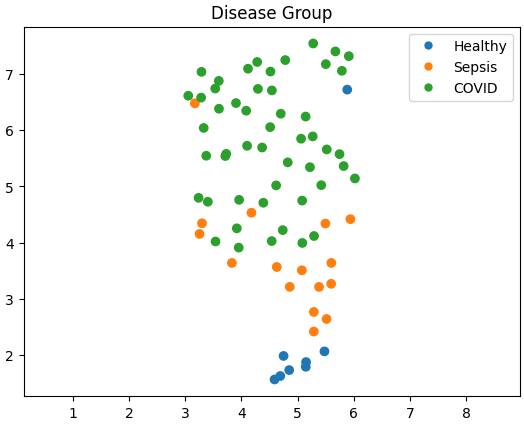

In [794]:
df = pd.read_csv(l1 + "/latent_data.csv").set_index("Sample")
f1["AE"] = np.array(df)

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(analysis_input, "AE_fused1"))
plt.xlabel = "UMAP Dimension 1"
plt.ylabel = "UMAP Dimension 2"

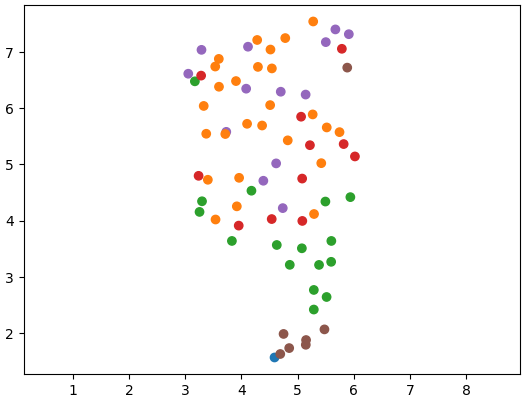

In [795]:
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in d_dataframe.Disease.map({j: i for i, j in enumerate(set(d_dataframe.Disease))})])
plt.gca().set_aspect('equal', 'datalim')

In [796]:
ad_obj1 = ad.AnnData(df)
scanpy.pp.neighbors(ad_obj1, n_neighbors=7, metric='sqeuclidean', use_rep='X')
neighbors = scipy.sparse.csr_matrix.todense(ad_obj1.obsp["connectivities"])

labels_dg_1 = {}
labels_d_1 = {}

for i,n in enumerate(neighbors):
   nearest_neighbors = n.nonzero()[1]
   counts = dict(Counter(list(dg_dataframe.T[list(ad_obj1.obs_names[nearest_neighbors])].T["DiseaseGroup"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_dg_1[ad_obj1.obs_names[i]] = label

   counts = dict(Counter(list(d_dataframe.T[list(ad_obj1.obs_names[nearest_neighbors])].T["Disease"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_d_1[ad_obj1.obs_names[i]] = label

binary_l1_dg = {}
for k,v in labels_dg_1.items():
    binary_l1_dg[k] = dg_dataframe.loc[k, "DiseaseGroup"] == v

binary_l1_d = {}
for k,v in labels_d_1.items():
    binary_l1_d[k] = d_dataframe.loc[k, "Disease"] == v


In [797]:
new_labels = {n: i for i,n in enumerate(set(labels_d_1.values()))}
disease_labels = []
for l in labels_d_1.values():
    disease_labels.append(new_labels[l])


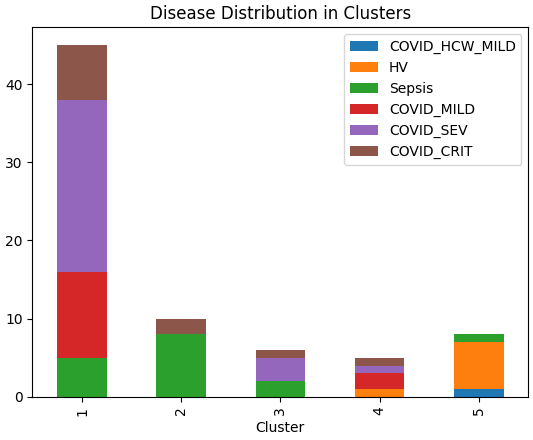

In [798]:
l1_cluster_summary = {c:{d: 0 for d in list(level1_graphs["G0"].obs.Disease)}  | {"Cluster":int(c)+1} for c in set(disease_labels)}
for p, c in enumerate(disease_labels):
    l1_cluster_summary[c][list(level1_graphs["G0"].obs.Disease)[p]]+=1

df = pd.DataFrame(l1_cluster_summary).T

t = df.plot(x = "Cluster", stacked=True, kind = "bar",
        title='Disease Distribution in Clusters').get_figure()

t.savefig(os.path.join(analysis_input, "AE_clusters1"))

In [799]:
acc1_dg = round(sum(list(binary_l1_dg.values()))/ 74, 4)
acc1_d = round(sum(list(binary_l1_d.values()))/ 74, 4)

f11_dg = round(skl.metrics.f1_score(list(dg_dataframe["DiseaseGroup"]), list(labels_dg_1.values()), average = "weighted"),4)
f11_d = round(skl.metrics.f1_score(list(d_dataframe["Disease"]), list(labels_d_1.values()), average = "weighted"),4)

print("L1     acc d:", acc1_d, ", acc dg:", acc1_dg, ", f1 d:", f11_d, ", f1 dg:",f11_dg )

L1     acc d: 0.527 , acc dg: 0.8514 , f1 d: 0.483 , f1 dg: 0.8338


In [800]:
anal1["AE"]["D_acc"] = acc1_d
anal1["AE"]["DG_acc"] = acc1_dg
anal1["AE"]["D_F1"] = f11_d
anal1["AE"]["DG_F1"] = f11_dg

cluster1["AE"] = disease_labels

In [801]:
d_overview["d1"] = (pd.DataFrame(binary_l1_d, index = ["correct"]).T.join(d_dataframe).groupby("Disease").sum().to_numpy() / pd.DataFrame(x, index=["Count"]).T.to_numpy()).T.squeeze()

In [802]:
dg_overview["dg1"] = (pd.DataFrame(binary_l1_dg, index = ["correct"]).T.join(dg_dataframe).groupby("DiseaseGroup").sum().to_numpy() / pd.DataFrame(y, index=["Count"]).T.to_numpy()).T.squeeze()

## UMAP- LEVEL 2

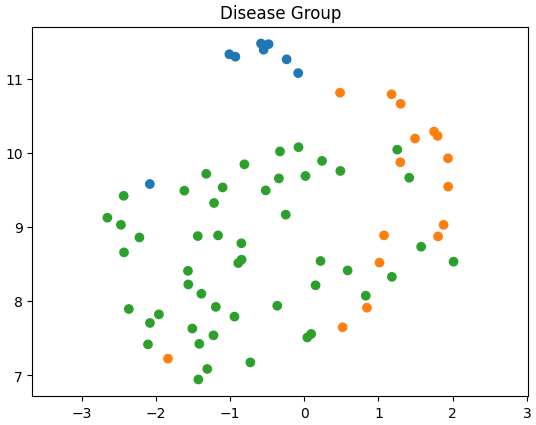

In [803]:
df = pd.read_csv(l2 + "/latent_data.csv").set_index("Sample")
f2["AE"] = np.array(df)

reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(analysis_input, "AE_fused2"))
plt.xlabel = "UMAP Dimension 1"
plt.ylabel = "UMAP Dimension 2"

In [804]:
ad_obj2 = ad.AnnData(df)
scanpy.pp.neighbors(ad_obj2, n_neighbors=7, metric='sqeuclidean', use_rep='X')
neighbors = scipy.sparse.csr_matrix.todense(ad_obj2.obsp["connectivities"])

labels_dg_2 = {}
labels_d_2 = {}

for i,n in enumerate(neighbors):
   nearest_neighbors = n.nonzero()[1]
   counts = dict(Counter(list(dg_dataframe.T[list(ad_obj2.obs_names[nearest_neighbors])].T["DiseaseGroup"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_dg_2[ad_obj2.obs_names[i]] = label

   counts = dict(Counter(list(d_dataframe.T[list(ad_obj2.obs_names[nearest_neighbors])].T["Disease"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_d_2[ad_obj2.obs_names[i]] = label

binary_l2_dg = {}
for k,v in labels_dg_2.items():
    binary_l2_dg[k] = dg_dataframe.loc[k, "DiseaseGroup"] == v

binary_l2_d = {}
for k,v in labels_d_2.items():
    binary_l2_d[k] = d_dataframe.loc[k, "Disease"] == v


In [805]:
acc2_dg = round(sum(list(binary_l2_dg.values()))/ 74, 4)
acc2_d = round(sum(list(binary_l2_d.values()))/ 74, 4)

f12_dg = round(skl.metrics.f1_score(list(dg_dataframe["DiseaseGroup"]), list(labels_dg_2.values()), average = "weighted"),4)
f12_d = round(skl.metrics.f1_score(list(d_dataframe["Disease"]), list(labels_d_2.values()), average = "weighted"),4)

print("L2     acc d:", acc2_d, ", acc dg:", acc2_dg, ", f1 d:", f12_d, ", f1 dg:",f12_dg )

L2     acc d: 0.5541 , acc dg: 0.8919 , f1 d: 0.5043 , f1 dg: 0.8822


In [806]:
new_labels = {n: i for i,n in enumerate(set(labels_d_2.values()))}
disease_labels = []
for l in labels_d_2.values():
    disease_labels.append(new_labels[l])

In [807]:
anal2["AE"]["D_acc"] = acc2_d
anal2["AE"]["DG_acc"] = acc2_dg
anal2["AE"]["D_F1"] = f12_d
anal2["AE"]["DG_F1"] = f12_dg

cluster2["AE"] = disease_labels

In [808]:
d_overview["d2"] = (pd.DataFrame(binary_l2_d, index = ["correct"]).T.join(d_dataframe).groupby("Disease").sum().to_numpy() / pd.DataFrame(x, index=["Count"]).T.to_numpy()).T.squeeze()

In [809]:
dg_overview["dg2"] = (pd.DataFrame(binary_l2_dg, index = ["correct"]).T.join(dg_dataframe).groupby("DiseaseGroup").sum().to_numpy() / pd.DataFrame(y, index=["Count"]).T.to_numpy()).T.squeeze()

## UMAP- LEVEL 3

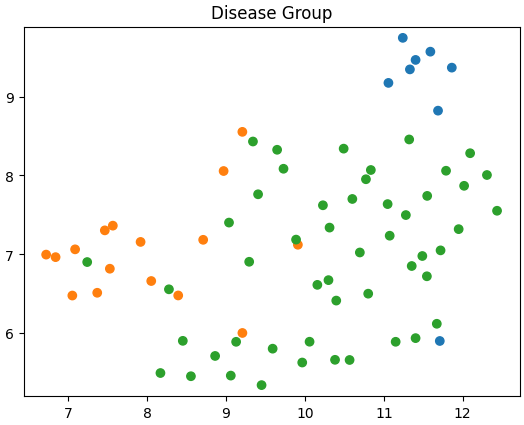

In [810]:
df = pd.read_csv(l3 + "/latent_data.csv").set_index("Sample")
f3["AE"] = np.array(df)

reducer1 = umap.UMAP()
embedding1 = reducer1.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(analysis_input, "AE_fused3"))
plt.xlabel = "UMAP Dimension 1"
plt.ylabel = "UMAP Dimension 2"

In [811]:
ad_obj3 = ad.AnnData(df)
scanpy.pp.neighbors(ad_obj3, n_neighbors=7, metric='sqeuclidean', use_rep='X')
neighbors = scipy.sparse.csr_matrix.todense(ad_obj3.obsp["connectivities"])

labels_dg_3 = {}
labels_d_3 = {}

for i,n in enumerate(neighbors):
   nearest_neighbors = n.nonzero()[1]
   counts = dict(Counter(list(dg_dataframe.T[list(ad_obj3.obs_names[nearest_neighbors])].T["DiseaseGroup"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_dg_3[ad_obj3.obs_names[i]] = label

   counts = dict(Counter(list(d_dataframe.T[list(ad_obj3.obs_names[nearest_neighbors])].T["Disease"])))
   counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
   label = list(counts.keys())[-1]
   labels_d_3[ad_obj3.obs_names[i]] = label

binary_l3_dg = {}
for k,v in labels_dg_3.items():
    binary_l3_dg[k] = dg_dataframe.loc[k, "DiseaseGroup"] == v

binary_l3_d = {}
for k,v in labels_d_3.items():
    binary_l3_d[k] = d_dataframe.loc[k, "Disease"] == v


In [812]:
acc3_dg = round(sum(list(binary_l3_dg.values()))/ 74, 4)
acc3_d = round(sum(list(binary_l3_d.values()))/ 74, 4)

f13_dg = round(skl.metrics.f1_score(list(dg_dataframe["DiseaseGroup"]), list(labels_dg_3.values()), average = "weighted"),4)
f13_d = round(skl.metrics.f1_score(list(d_dataframe["Disease"]), list(labels_d_3.values()), average = "weighted"),4)

print("L3     acc d:", acc3_d, ", acc dg:", acc3_dg, ", f1 d:", f13_d, ", f1 dg:",f13_dg )

L3     acc d: 0.527 , acc dg: 0.8514 , f1 d: 0.4802 , f1 dg: 0.8385


In [813]:
new_labels = {n: i for i,n in enumerate(set(labels_d_3.values()))}
disease_labels = []
for l in labels_d_3.values():
    disease_labels.append(new_labels[l])

In [814]:
anal3["AE"]["D_acc"] = acc3_d
anal3["AE"]["DG_acc"] = acc3_dg
anal3["AE"]["D_F1"] = f13_d
anal3["AE"]["DG_F1"] = f13_dg


cluster3["AE"] = disease_labels

In [815]:
d_overview["d3"] = (pd.DataFrame(binary_l3_d, index = ["correct"]).T.join(d_dataframe).groupby("Disease").sum().to_numpy() / pd.DataFrame(x, index=["Count"]).T.to_numpy()).T.squeeze()

In [816]:
dg_overview["dg3"] = (pd.DataFrame(binary_l3_dg, index = ["correct"]).T.join(dg_dataframe).groupby("DiseaseGroup").sum().to_numpy() / pd.DataFrame(y, index=["Count"]).T.to_numpy()).T.squeeze()

In [817]:
pd.DataFrame(dg_overview, index=y.keys()).to_csv(os.path.join(analysis_input, "AE_dg_acc.csv"))

In [818]:
pd.DataFrame(d_overview, index=x.keys()).to_csv(os.path.join(analysis_input, "AE_d_acc.csv"))

In [819]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/analysis_level1.pickle")), "wb") as f:
     pickle.dump(anal1, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/analysis_level2.pickle")), "wb") as f:
    pickle.dump(anal2, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/analysis_level3.pickle")), "wb") as f:
    pickle.dump(anal3, f)

In [820]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/level1_clustering.pickle")), "wb") as f:
     pickle.dump(cluster1, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/level2_clustering.pickle")), "wb") as f:
    pickle.dump(cluster2, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/level3_clustering.pickle")), "wb") as f:
    pickle.dump(cluster3, f)

In [821]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/level1_fusions.pickle")), "wb") as f:
     pickle.dump(f1, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/level2_fusions.pickle")), "wb") as f:
    pickle.dump(f2, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/level3_fusions.pickle")), "wb") as f:
    pickle.dump(f3, f)

# Enrichment - Preparation

## L1

In [822]:
#### MoGCN #####
i = 0
results_L1 = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]
top_n_features_per_pb1 = {}

for filename in os.listdir(l1):
    if filename.find("topn") > -1:
        data_path = os.path.join(l1, filename)
        df = pd.read_csv(data_path, header=0, index_col=None)["epoch_150"]
        features = []
        for item in list(df):
            if item.find("citeRNA") > -1:
                item = item.split("citeRNA")[0]  
            elif item.find("bulkRNA") > -1:
                item = item.split("bulkRNA")[0]  
            elif item.find("facs") > -1:
                item = item.split("facs")[0]  
            elif item.find("luminex") > -1:
                item = item.split("luminex")[0]  
            elif item.find("cytof") > -1:
                item = item.split("cytof")[0]  
            elif item.find("adt") > -1:
                item = item.split("adt")[0] 
            features.append(item)

        top_n_features_per_pb1[filename.split("topn_omics_")[1].split(".csv")[0]] = features[:50] # extract top 50 features out of the top 200 featurs
        enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",  
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )# unranked test

        if not filename.find("luminex") > -1 and not filename.find("bulkRNA_black") > -1: # ranked test
            pre_res = gp.prerank(rnk=pd.DataFrame({"data" :features, "rank": [i for i in range(len(features))]}).set_index("data"), 
                        gene_sets=feature_set,
                        threads=4,
                        min_size=2,
                        max_size=1500,
                        permutation_num=1000, # reduce number to speed up testing
                        outdir=None, # don't write to disk
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
                
        results_L1[filename] = {"ranked":pre_res, "non-ranked": enr}

2023-11-23 17:51:00,605 [INFO] Parsing data files for GSEA.............................
2023-11-23 17:51:00,608 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-23 17:51:00,615 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-23 17:51:00,623 [INFO] 0069 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-11-23 17:51:00,624 [INFO] 0022 gene_sets used for further statistical testing.....
2023-11-23 17:51:00,624 [INFO] Start to run GSEA...Might take a while..................
2023-11-23 17:51:00,656 [INFO] Congratulations. GSEApy runs successfully................

2023-11-23 17:51:06,935 [INFO] Parsing data files for GSEA.............................
2023-11-23 17:51:06,935 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-23 17:51:06,937 [INFO] Enrichr library gene sets already downloaded in: 

KeyboardInterrupt: 

In [ ]:
# uncomment to know what genes ranked the same across different epochs
"""shared_l1 = {} 
for filename in os.listdir(l1):
    if filename.find("topn") > -1:
        data_path = os.path.join(l1, filename)
        df_all = pd.read_csv(data_path, header=0, index_col=None)
        shared_set = None
        for c in df_all.columns:
            df = df_all[c]
            features = []
            for item in list(df):
                if item.find("citeRNA") > -1:
                    item = item.split("citeRNA")[0]  
                elif item.find("bulkRNA") > -1:
                    item = item.split("bulkRNA")[0]  
                elif item.find("facs") > -1:
                    item = item.split("facs")[0]  
                elif item.find("luminex") > -1:
                    item = item.split("luminex")[0]  
                elif item.find("cytof") > -1:
                    item = item.split("cytof")[0]  
                elif item.find("adt") > -1:
                    item = item.split("adt")[0] 
                features.append(item)
            if shared_set is None:
                shared_set = set(features)
            else:
                shared_set = shared_set.intersection(set(features))
        shared_l1[filename] = shared_set"""

'shared_l1 = {} \nfor filename in os.listdir(l1):\n    if filename.find("topn") > -1:\n        data_path = os.path.join(l1, filename)\n        df_all = pd.read_csv(data_path, header=0, index_col=None)\n        shared_set = None\n        for c in df_all.columns:\n            df = df_all[c]\n            features = []\n            for item in list(df):\n                if item.find("citeRNA") > -1:\n                    item = item.split("citeRNA")[0]  \n                elif item.find("bulkRNA") > -1:\n                    item = item.split("bulkRNA")[0]  \n                elif item.find("facs") > -1:\n                    item = item.split("facs")[0]  \n                elif item.find("luminex") > -1:\n                    item = item.split("luminex")[0]  \n                elif item.find("cytof") > -1:\n                    item = item.split("cytof")[0]  \n                elif item.find("adt") > -1:\n                    item = item.split("adt")[0] \n                features.append(item)\n     

In [ ]:
##### Enrichment analysis (unranked) for Weighted average #####
i = 0
results_L1_wa = {} 
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for filename in wa1_names[:10]:
    data_path = os.path.join(input_level1, filename)
    df = pd.read_csv(data_path, header=0, index_col=None)
    features = []

    for item in list(df):
        if item.find("citeRNA") > -1:
            item = item.split("citeRNA")[0]  
        elif item.find("bulkRNA") > -1:
            item = item.split("bulkRNA")[0]  
        elif item.find("facs") > -1:
            item = item.split("facs")[0]  
        elif item.find("luminex") > -1:
            item = item.split("luminex")[0]  
        elif item.find("cytof") > -1:
            item = item.split("cytof")[0]  
        elif item.find("adt") > -1:
            item = item.split("adt")[0] 
        features.append(item)
            
    enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

                
    results_L1_wa[filename] = {"non-ranked": enr}

In [ ]:
##### Enrichment analysis (unranked) for SNF #####
i = 0
results_L1_snf = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for filename in snf1_names[:10]:
    data_path = os.path.join(input_level1, filename)
    df = pd.read_csv(data_path, header=0, index_col=None)
    features = []

    for item in list(df):
        if item.find("citeRNA") > -1:
            item = item.split("citeRNA")[0]  
        elif item.find("bulkRNA") > -1:
            item = item.split("bulkRNA")[0]  
        elif item.find("facs") > -1:
            item = item.split("facs")[0]  
        elif item.find("luminex") > -1:
            item = item.split("luminex")[0]  
        elif item.find("cytof") > -1:
            item = item.split("cytof")[0]  
        elif item.find("adt") > -1:
            item = item.split("adt")[0] 
        features.append(item)
            
    enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

                
    results_L1_snf[filename] = {"non-ranked": enr}

## L2

In [ ]:
### MoGCN ###
i = 0
results_L2 = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]
top_n_features_per_pb2 = {}

for filename in os.listdir(l2):
    if filename.find("topn") > -1:
        data_path = os.path.join(l2, filename)
        df = pd.read_csv(data_path, header=0, index_col=None)["epoch_150"]
        features = []
        for item in list(df):
            if item.find("citeRNA") > -1:
                item = item.split("citeRNA")[0]  
            elif item.find("bulkRNA") > -1:
                item = item.split("bulkRNA")[0]  
            elif item.find("facs") > -1:
                item = item.split("facs")[0]  
            elif item.find("luminex") > -1:
                item = item.split("luminex")[0]  
            elif item.find("cytof") > -1:
                item = item.split("cytof")[0]  
            elif item.find("adt") > -1:
                item = item.split("adt")[0] 
            features.append(item)
        
        top_n_features_per_pb2[filename.split("topn_omics_")[1].split(".csv")[0]] = features[:50]
        enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    
        pre_res = "None"
        if not filename.find("luminex") > -1: 
            pre_res = gp.prerank(rnk=pd.DataFrame({"data" :[f.upper() for f in features], "rank": [i for i in range(len(features))]}).set_index("data"), # or rnk = rnk,
                        gene_sets=feature_set,
                        threads=4,
                        min_size=2,
                        max_size=1500,
                        permutation_num=1000, # reduce number to speed up testing
                        outdir=None, # don't write to disk
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
                
        results_L2[filename] = {"ranked":pre_res, "non-ranked": enr}
                

2023-11-21 09:36:05,067 [INFO] Parsing data files for GSEA.............................
2023-11-21 09:36:05,069 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-21 09:36:05,072 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-21 09:36:05,078 [INFO] 0070 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-11-21 09:36:05,079 [INFO] 0021 gene_sets used for further statistical testing.....
2023-11-21 09:36:05,079 [INFO] Start to run GSEA...Might take a while..................
2023-11-21 09:36:05,115 [INFO] Congratulations. GSEApy runs successfully................

2023-11-21 09:36:08,702 [INFO] Parsing data files for GSEA.............................
2023-11-21 09:36:08,704 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-21 09:36:08,707 [INFO] Enrichr library gene sets already downloaded in: 

In [ ]:
### Weighted Average ####

i = 0
results_L2_wa = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for c, filename in enumerate(wa2_names[:5]):
    data_path = os.path.join(input_level2, filename.split("_L2")[0])
    df = pd.read_csv(data_path, header=0, index_col=None)
    features = []

    print(c)
    for item in list(df):
        if item.find("citeRNA") > -1:
            item = item.split("citeRNA")[0]  
        elif item.find("bulkRNA") > -1:
            item = item.split("bulkRNA")[0]  
        elif item.find("facs") > -1:
            item = item.split("facs")[0]  
        elif item.find("luminex") > -1:
            item = item.split("luminex")[0]  
        elif item.find("cytof") > -1:
            item = item.split("cytof")[0]  
        elif item.find("adt") > -1:
            item = item.split("adt")[0] 
        features.append(item)
            
    enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

                
    results_L2_wa[filename] = {"non-ranked": enr}

0
1
2
3
4


In [ ]:
### SNF ####

i = 0
results_L2_snf = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]

for c, filename in enumerate(snf2_names[:5]):
    data_path = os.path.join(input_level2, filename.split("_L2")[0])
    df = pd.read_csv(data_path, header=0, index_col=None)
    features = []
    
    print(c)
    for item in list(df):
        if item.find("citeRNA") > -1:
            item = item.split("citeRNA")[0]  
        elif item.find("bulkRNA") > -1:
            item = item.split("bulkRNA")[0]  
        elif item.find("facs") > -1:
            item = item.split("facs")[0]  
        elif item.find("luminex") > -1:
            item = item.split("luminex")[0]  
        elif item.find("cytof") > -1:
            item = item.split("cytof")[0]  
        elif item.find("adt") > -1:
            item = item.split("adt")[0] 
        features.append(item)
            
    enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

                
    results_L2_snf[filename] = {"non-ranked": enr}

0
1
2
3
4


## L3

In [ ]:
i = 0
results_L3 = {}
feature_set = ["KEGG_2021_Human", "MSigDB_Hallmark_2020"]
top_n_features_per_pb3 = {}

for filename in os.listdir(l3):
    if filename.find("topn") > -1:
        data_path = os.path.join(l3, filename)
        df = pd.read_csv(data_path, header=0, index_col=None)["epoch_150"]
        features = []
        for item in list(df):
            if item.find("citeRNA") > -1:
                item = item.split("citeRNA")[0]  
            elif item.find("bulkRNA") > -1:
                item = item.split("bulkRNA")[0]  
            elif item.find("facs") > -1:
                item = item.split("facs")[0]  
            elif item.find("luminex") > -1:
                item = item.split("luminex")[0]  
            elif item.find("cytof") > -1:
                item = item.split("cytof")[0]  
            elif item.find("adt") > -1:
                item = item.split("adt")[0] 
            features.append(item)

        top_n_features_per_pb3[filename.split("topn_omics_")[1].split(".csv")[0]] = features[:50]

        enr = gp.enrichr(gene_list=features, # or "./tests/data/gene_list.txt",
                 #gene_sets=gp.get_library_name(organism='Human'),
                 gene_sets = feature_set,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
                
        pre_res = "None"
        if not filename.find("luminex") > -1:  
            pre_res = gp.prerank(rnk=pd.DataFrame({"data" :[f.upper() for f in features], "rank": [i for i in range(len(features))]}).set_index("data"), # or rnk = rnk,
                        gene_sets=feature_set,
                        threads=4,
                        min_size=2,
                        max_size=1500,
                        permutation_num=1000, # reduce number to speed up testing
                        outdir=None, # don't write to disk
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
                
        results_L3[filename] = {"ranked":pre_res, "non-ranked": enr}

2023-11-21 09:47:13,082 [INFO] Parsing data files for GSEA.............................
2023-11-21 09:47:13,083 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-21 09:47:13,086 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-21 09:47:13,092 [INFO] 0090 gene_sets have been filtered out when max_size=1500 and min_size=2
2023-11-21 09:47:13,093 [INFO] 0001 gene_sets used for further statistical testing.....
2023-11-21 09:47:13,093 [INFO] Start to run GSEA...Might take a while..................
2023-11-21 09:47:13,099 [INFO] Congratulations. GSEApy runs successfully................

2023-11-21 09:47:16,545 [INFO] Parsing data files for GSEA.............................
2023-11-21 09:47:16,546 [INFO] Enrichr library gene sets already downloaded in: /Users/shakiba/.cache/gseapy, use local file
2023-11-21 09:47:16,549 [INFO] Enrichr library gene sets already downloaded in: 

# HeatMap

In [ ]:
top_n = {"L1": top_n_features_per_pb1, "L2": top_n_features_per_pb2, "L3": top_n_features_per_pb3}

In [ ]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/top_n_heatmap_info.pickle")), "wb") as f:
     pickle.dump(top_n, f)

In [849]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/top_n_heatmap_info.pickle")), "rb") as f:
     top_n = pickle.load(f)

Feature extraction

In [850]:
########## Level 1 Feature extraxtion for the heatmap ##############
heatmap_info_level1 = {}
F = []

# extract the top 200 features of the top performing PSNs
for name in wa12_names[:10]: # top 10 PSNs of WA-L1 WOT
    features = list(top_n_features_per_pb1[name])
    id = name_to_id[name]
    g = level1_graphs[id]
    heatmap_info_level1[name] = g[:, g.var_names.isin(features)].to_df()
    F+= features

for name in snf12_names[:10]: # top 10 PSNs of SNF-L1 WOT
    if name not in heatmap_info_level1.keys():
        features = list(top_n_features_per_pb1[name])
        id = name_to_id[name]
        g = level1_graphs[id]
        heatmap_info_level1[name] = g[:, g.var_names.isin(features)].to_df()
        F+= features

F = list(set(F))

heatmap_info_level1_copy = heatmap_info_level1.copy()

modality1 = [] # What modality are the features from
for k,v in heatmap_info_level1_copy.items():
    names = []
    for c in v.columns:
        names.append(c + "_" + k)
    heatmap_info_level1_copy[k].columns = names
    modality1 = modality1 + [k] * len(names)

KeyError: 'citeRNA_B-black'

In [851]:
########## Level 1 Feature extraxtion for the heatmap ##############
heatmap_info_level2 = {}
F = []

for k in top_n_features_per_pb2.keys():
    features = list(top_n_features_per_pb2[k.split("_L2")[0]])
    id = name_to_id[k + "_L2"]
    g = level2_graphs[id]
    heatmap_info_level2[k.split("_L2")[0]] = g[:, g.var_names.isin(features)].to_df()
    F+= features

F = list(set(F))

heatmap_info_level2_copy = heatmap_info_level2.copy()

modality2 = [] 
for k,v in heatmap_info_level2_copy.items():
    names = []
    for c in v.columns:
        names.append(c + "_" + k)
    heatmap_info_level2_copy[k].columns = names
    modality2 = modality2 + [k] * len(names)

In [852]:
########## Level 3 Feature extraxtion for the heatmap ##############
heatmap_info_level3 = {}
F = []

for k in top_n_features_per_pb3.keys():
    features = list(top_n_features_per_pb3[k.split("_L3")[0]])
    id = name_to_id[k + "_L3"]
    g = level3_graphs[id]
    heatmap_info_level3[k.split("_L3")[0]] = g[:, g.var_names.isin(features)].to_df()
    F+= features

F = list(set(F))

heatmap_info_level3_copy = heatmap_info_level3.copy()

modality3 = [] 
for k,v in heatmap_info_level3_copy.items():
    names = []
    for c in v.columns:
        names.append(c + "_" + k)
    heatmap_info_level3_copy[k].columns = names
    modality3 = modality3 + [k] * len(names)

Merging the expressions from pseudobulks of high contributing PSNs each from a method.

In [827]:
high_cont = set(wa12_names + snf12_names[:10] + snf1_names[:10]) # All highly contributing PSNs to WA-L1 WOT, SNF-L1 WOT, SNF-L1 Standard for best performing versions of WA, SNF and Sparse-SNF in Level 1
i = 0
df = None

for filename in high_cont:
    data_path = os.path.join(input_level1, filename)
    new_df = pd.read_csv(data_path, header=0, index_col=None).set_index("Unnamed: 0")
    new_df = new_df.rename({i: i + "_" + filename for i in new_df.columns}, axis=1)
    if df is None:
        df = new_df
    else:
        df = df.join(new_df)

new_df_ad = ad.AnnData(new_df)
scanpy.pp.highly_variable_genes(new_df_ad)

In [853]:
wa_clusters1 = cluster12["fused_knn_frequency"]
sparse_snf_clusters1 = cluster1["sparse_SNF"]
ae_clusters1 = cluster1["AE"]
snf_clusters2 = cluster22["fused_kernels"]

disease_groups = list(patient_to_disease_group.values())

In [854]:
colors = ["orchid", "peachpuff", "cyan", "purple", "green", "dodgerblue", "blue", "skyblue", "olive", "darkorange", "chocolate", "darkgray", "orangered", "yellowgreen", "darkgreen", "grey", "wheat", "pink", "yellow", "indigo", "lightpink", "mediumpurple", "goldenrod", "palevioletred", "orangered", "Thistle" ]

In [856]:
# Combine the features and expressions of these top performing PSNs all in one dataframe 
df1 = None
for v in heatmap_info_level1_copy.values():
    if df1 is None:
        df1 = v
    else:
        df1 = df1.join(v)

df2 = None
for v in heatmap_info_level2_copy.values():
    if df2 is None:
        df2 = v
    else:
        df2 = df2.join(v)"

df3 = None
for v in heatmap_info_level3_copy.values():
    if df3 is None:
        df3 = v
    else:
        df3 = df3.join(v)

In [857]:
wa_clusters1 = ["Cluster " + str(val) for val in wa_clusters1]
sparse_snf_clusters1 = ["Cluster " + str(val) for val in sparse_snf_clusters1]
ae_clusters1 = ["Cluster " + str(val) for val in ae_clusters1]
snf_clusters2 = ["Cluster " + str(val) for val in snf_clusters2]


Normalizing the features to the range -2 and +2

In [858]:
scaler = MinMaxScaler((-2,2))
new_df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)
new_df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)
new_df3 = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns, index=df3.index)

Filtering interesting features, i.e. keeping only those which have at least 15 expressions (corresponding to 15 patients) that deviate by at least 0.9 from the mean expression of that feature. 

In [872]:
x = dict(new_df1.mean(axis = 0))
keep = []
for k,v in x.items():
    diff = (np.abs(np.array(new_df1[k]) - v) > 0.9).sum()
    if  diff > 15:
        keep.append(k)
len(keep)

470

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tm

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


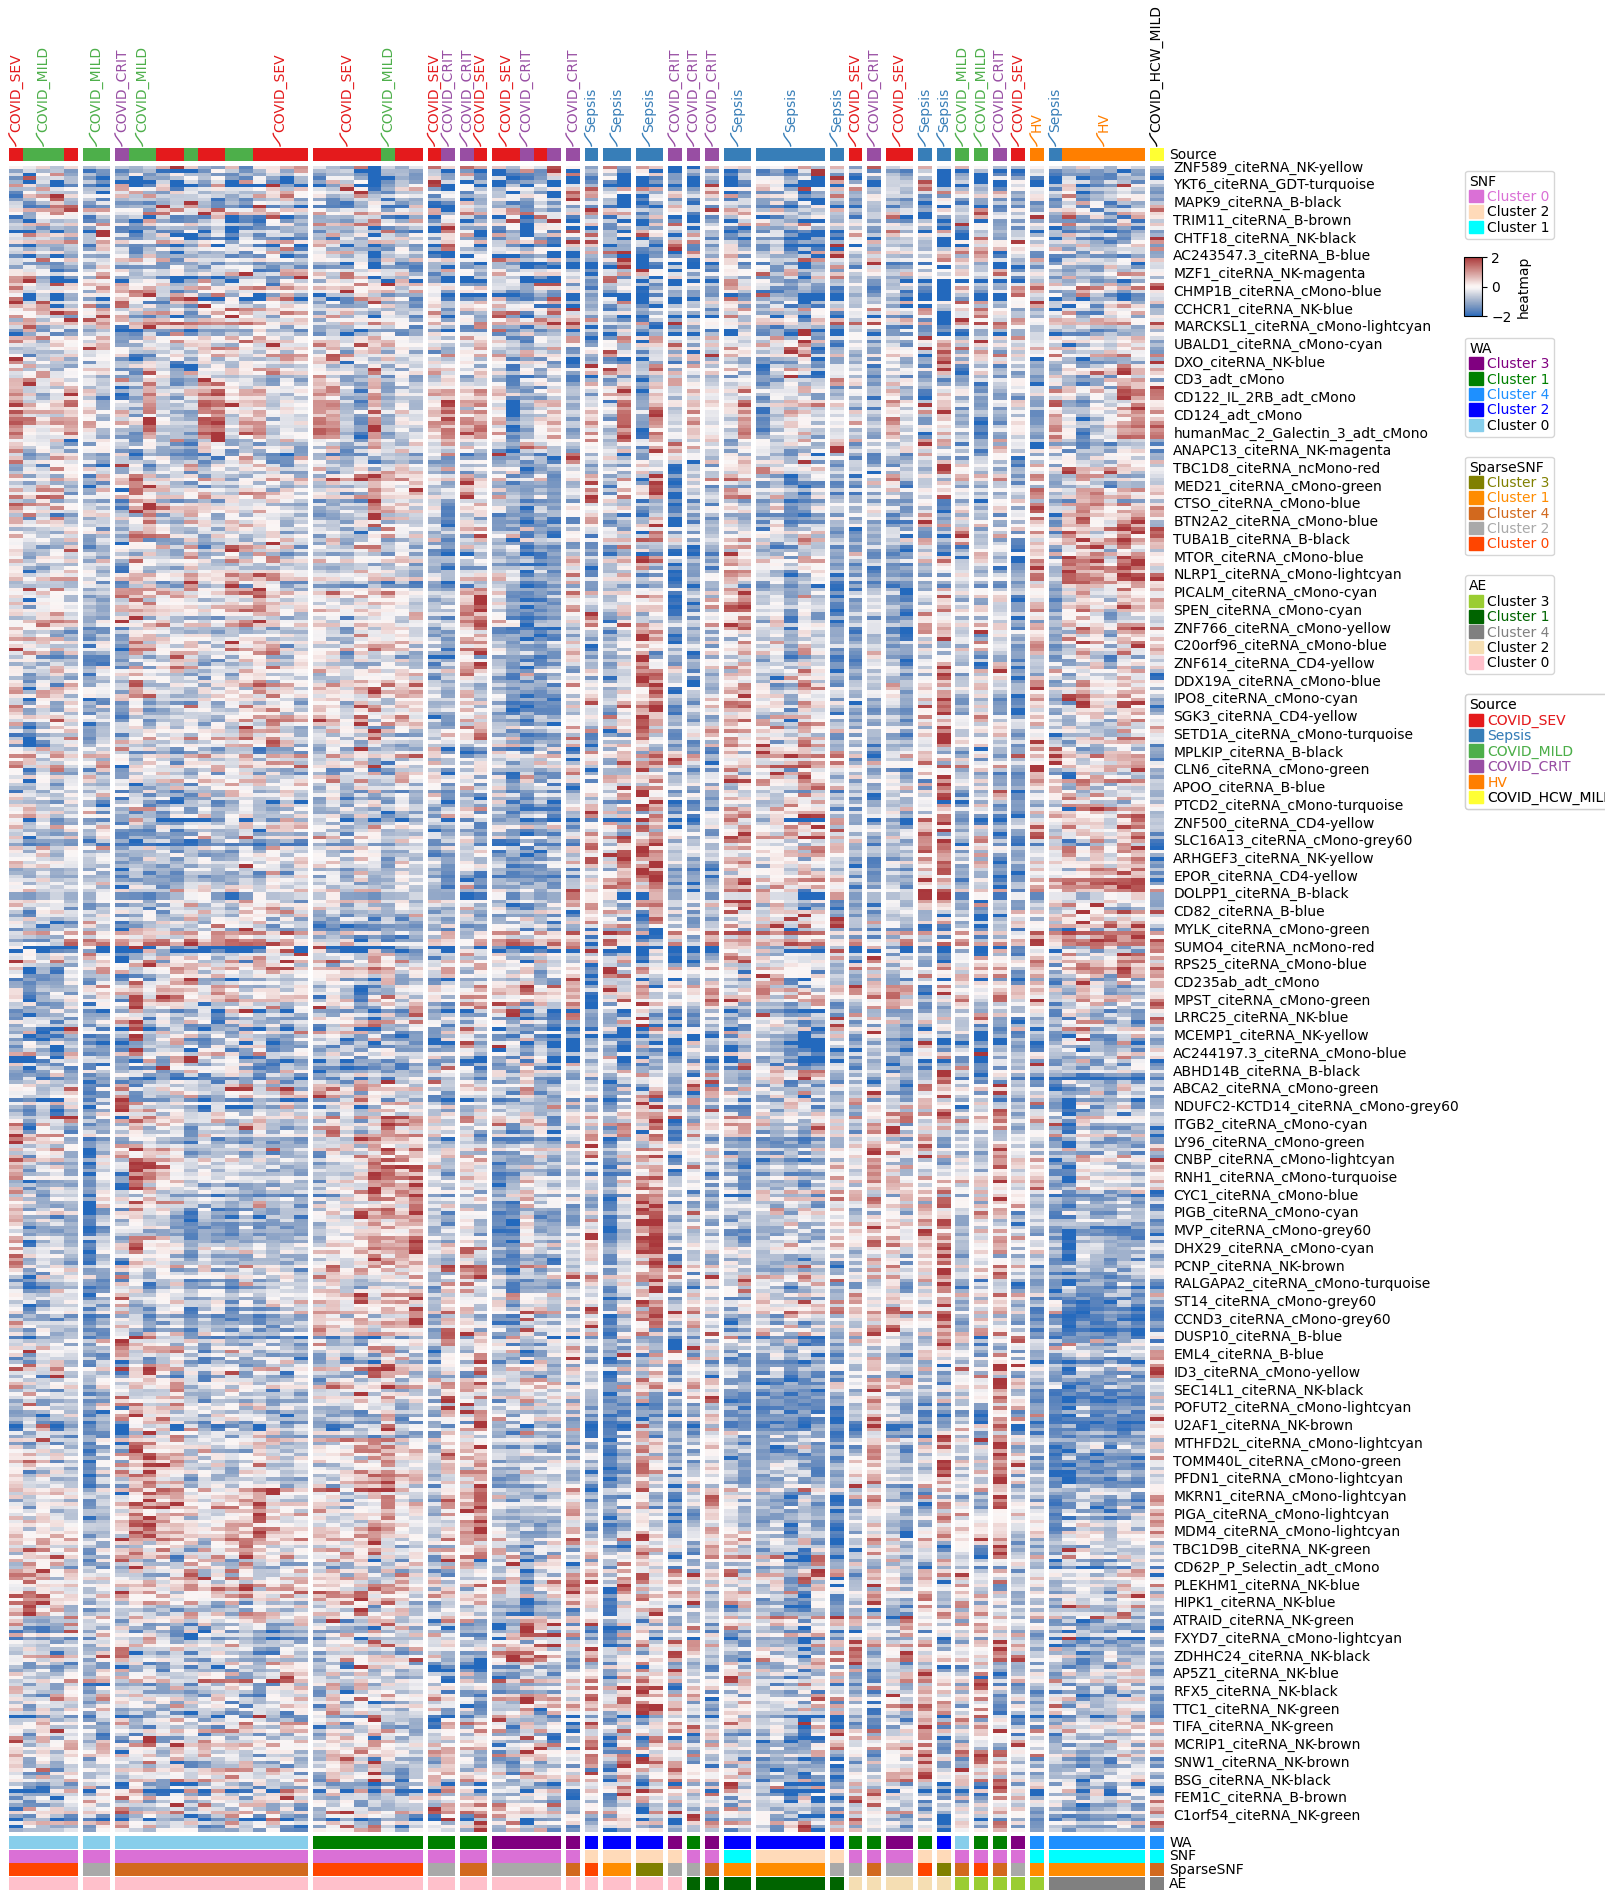

In [876]:
#df_column = pd.DataFrame(snf_clusters2, columns=["SNF Clusters"], index=list(level1_graphs["G0"].obs_names) ).join(pd.DataFrame(wa_clusters2, columns=["WA Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(list(level1_graphs["G0"].obs.Disease), columns=["Source Labels"], index=list(level1_graphs["G0"].obs_names)) ).join(pd.DataFrame(sparse_snf_clusters2, columns=["Sparse SNF Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(ae_clusters2, columns=["AE Clusters"], index=list(level1_graphs["G0"].obs_names) ))
df_column = pd.DataFrame(snf_clusters2, columns=["SNF Clusters"], index=list(level1_graphs["G0"].obs_names) ).join(pd.DataFrame(ae_clusters1, columns=["AE Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(sparse_snf_clusters1, columns=["SparseSNF Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(wa_clusters1, columns=["WA Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(list(level1_graphs["G0"].obs.Disease), columns=["Source Labels"], index=list(level1_graphs["G0"].obs_names)) )


col_colors_dict = {"WA Clusters":{}, "SNF Clusters": {}, "SparseSNF Clusters":{}, "AE Clusters": {},  "Source Labels":{}}

j = 0
for i in set(snf_clusters2):
    #col_colors_dict["SNF Clusters"][i] = colors[j]
    col_colors_dict["SNF Clusters"][i] = colors[j] 
    j+=1
for i in set(wa_clusters1):
    col_colors_dict["WA Clusters"][i] = colors[j] 
    j+=1
for i in set(sparse_snf_clusters1):
    col_colors_dict["SparseSNF Clusters"][i] = colors[j] 
    j+=1
for i in set(ae_clusters1):
    col_colors_dict["AE Clusters"][i] = colors[j] 
    j+=1
for i in set(list(level1_graphs["G0"].obs.Disease)):
    col_colors_dict["Source Labels"][i] = colors[j] 
    j+=1

col_ha2= HeatmapAnnotation(WA= anno_simple(df_column["WA Clusters"],colors=col_colors_dict['WA Clusters'],rasterized=True),
                          SNF=anno_simple(df_column["SNF Clusters"],colors=col_colors_dict['SNF Clusters'],rasterized=True),
                          SparseSNF = anno_simple(df_column["SparseSNF Clusters"],colors=col_colors_dict['SparseSNF Clusters'],rasterized=True),
                          AE = anno_simple(df_column["AE Clusters"],colors=col_colors_dict['AE Clusters'],rasterized=True),
                          axis=1)

col_ha1= HeatmapAnnotation(label = anno_label(df_column["Source Labels"], merge=True),
                          Source=df_column["Source Labels"],
                          axis=1)


fig, ax = plt.subplots(figsize=(15,20))

plot = ClusterMapPlotter(new_df1[keep].T, top_annotation=col_ha1, bottom_annotation=col_ha2,
                    col_cluster=True,row_cluster=True,
                     show_rownames=True,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:,["AE Clusters", "SNF Clusters", "WA Clusters", "SparseSNF Clusters"]],
                     cmap='vlag',
                     rasterized=True,col_split_gap=1.4,legend=True,legend_anchor='ax_heatmap',legend_vpad=2,legend_hpad= 2, row_split_gap=1.2 )

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..


/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/PyComplexHeatmap/clustermap.py:812: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/shakiba/Desktop/thesis.tm

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations
Plotting legends..


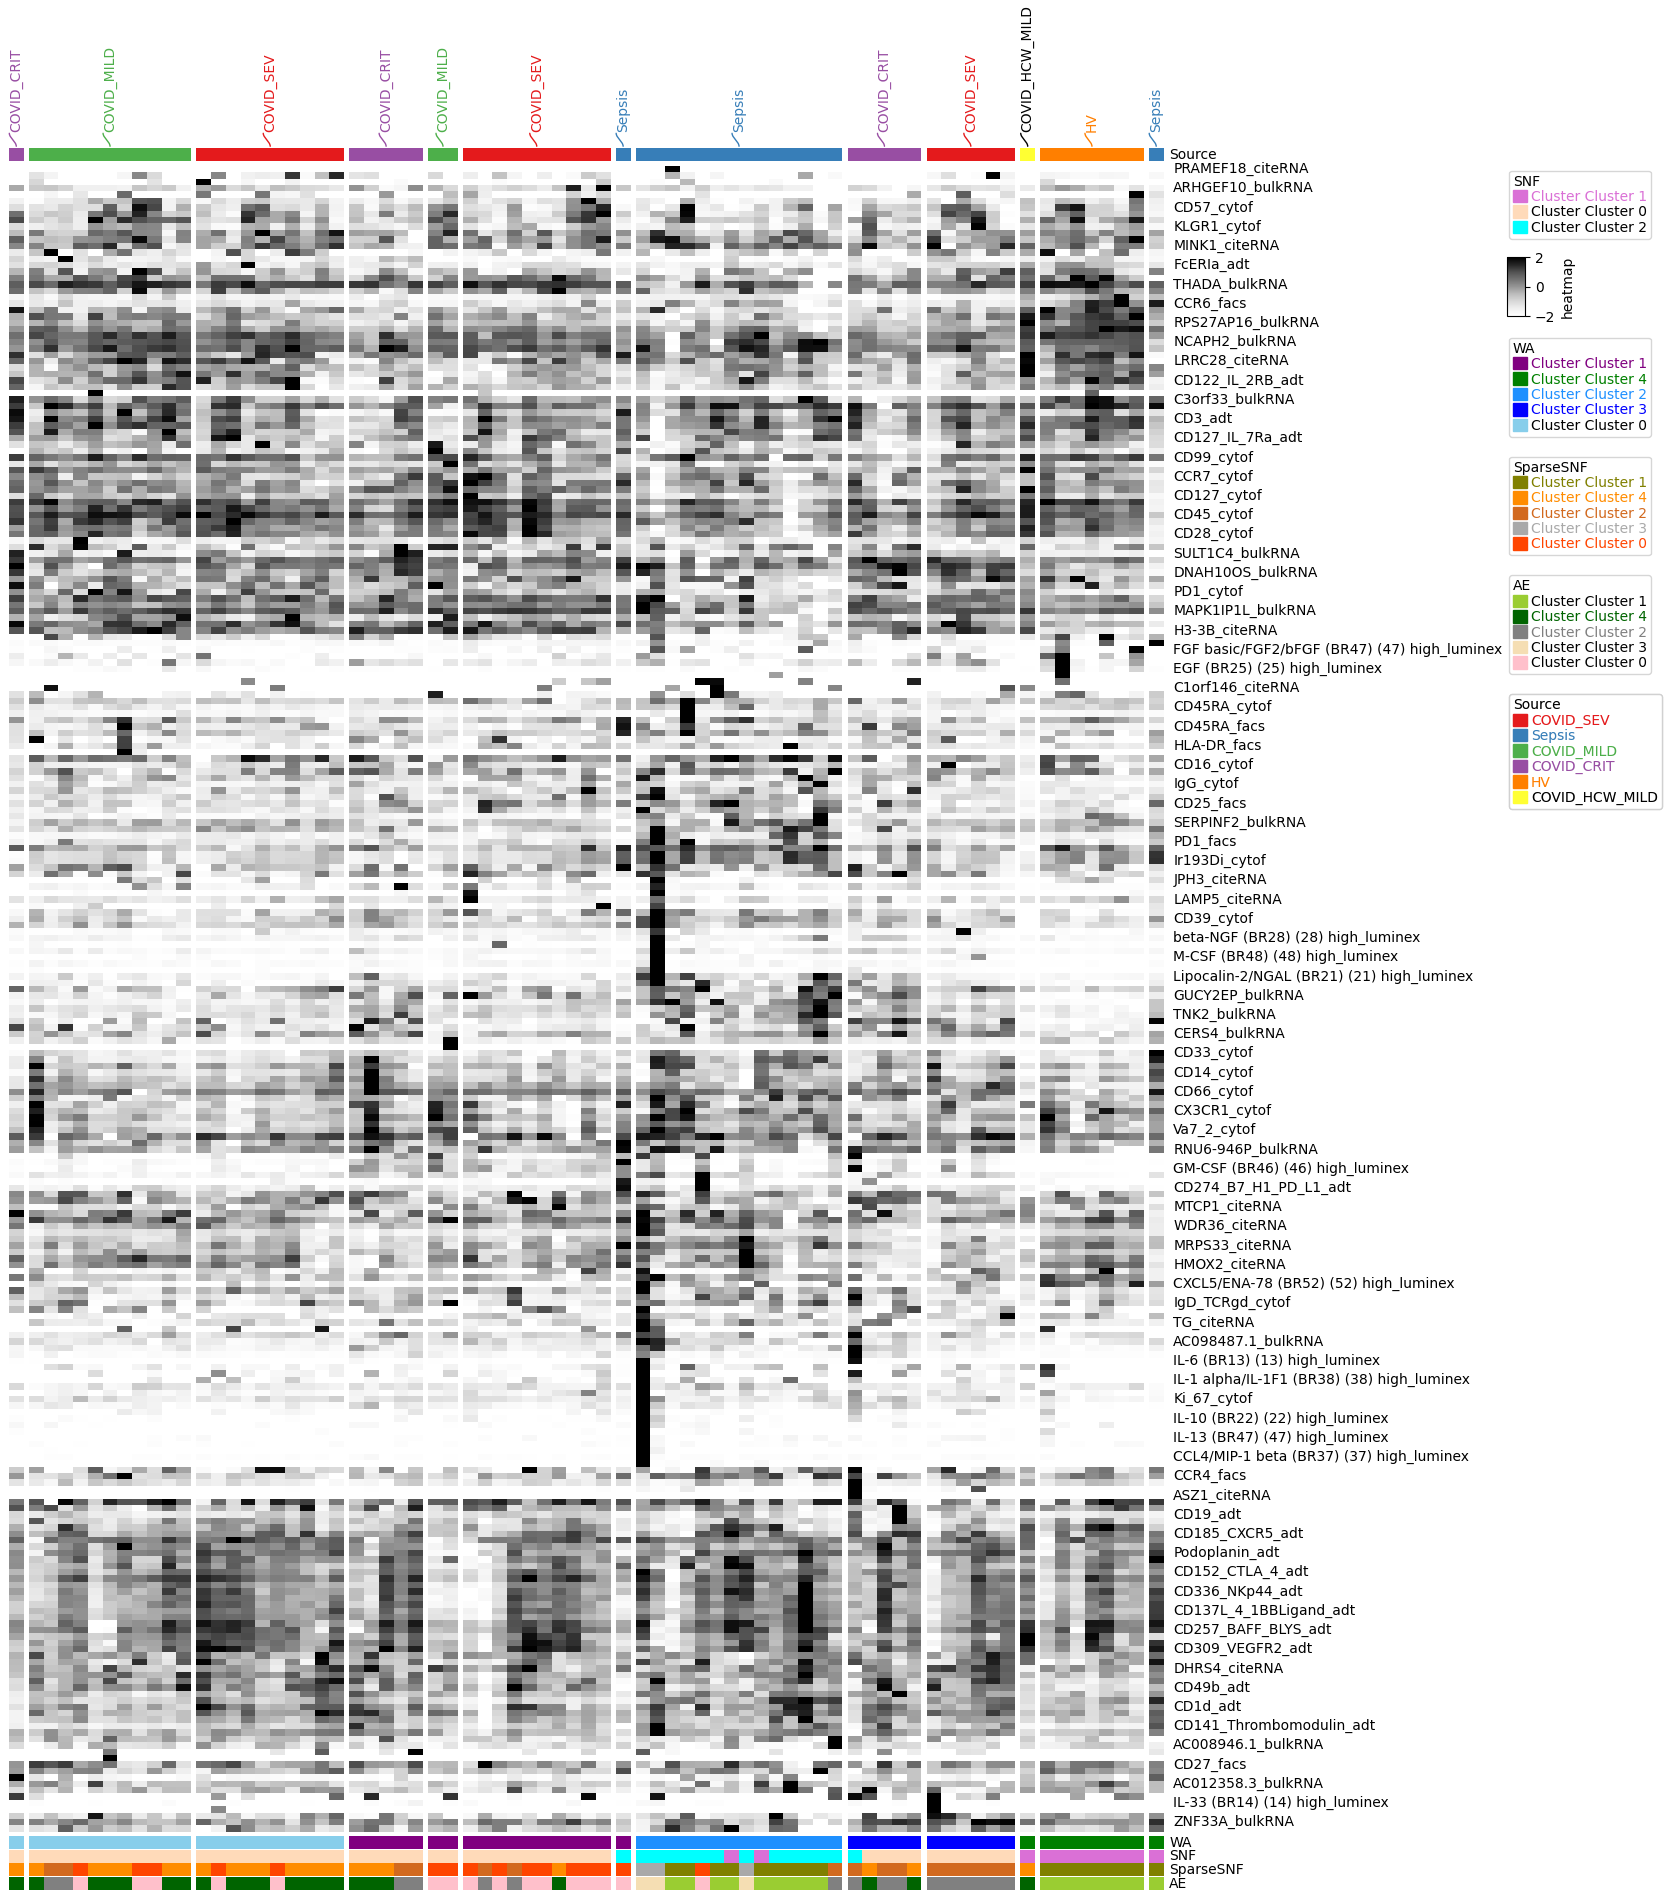

In [ ]:
df_column = pd.DataFrame(snf_clusters2, columns=["SNF Clusters"], index=list(level1_graphs["G0"].obs_names) ).join(pd.DataFrame(sparse_snf_clusters1, columns=["AE Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(sparse_snf_clusters1, columns=["SparseSNF Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(wa_clusters1, columns=["WA Clusters"], index=list(level1_graphs["G0"].obs_names) )).join(pd.DataFrame(list(level1_graphs["G0"].obs.Disease), columns=["Source Labels"], index=list(level1_graphs["G0"].obs_names)) )

col_colors_dict = {"WA Clusters":{}, "SNF Clusters": {}, "SparseSNF Clusters":{}, "AE Clusters": {},  "Source Labels":{}}

j = 0
for i in set(snf_clusters2):
    #col_colors_dict["SNF Clusters"][i] = colors[j]
    col_colors_dict["SNF Clusters"][i] = colors[j] 
    j+=1
for i in set(wa_clusters1):
    col_colors_dict["WA Clusters"][i] = colors[j] 
    j+=1
for i in set(sparse_snf_clusters1):
    col_colors_dict["SparseSNF Clusters"][i] = colors[j] 
    j+=1
for i in set(ae_clusters1):
    col_colors_dict["AE Clusters"][i] = colors[j] 
    j+=1
for i in set(list(level1_graphs["G0"].obs.Disease)):
    col_colors_dict["Source Labels"][i] = colors[j] 
    j+=1

col_ha2= HeatmapAnnotation(WA= anno_simple(df_column["WA Clusters"],colors=col_colors_dict['WA Clusters'],rasterized=True),
                          SNF=anno_simple(df_column["SNF Clusters"],colors=col_colors_dict['SNF Clusters'],rasterized=True),
                          SparseSNF = anno_simple(df_column["SparseSNF Clusters"],colors=col_colors_dict['SparseSNF Clusters'],rasterized=True),
                          AE = anno_simple(df_column["AE Clusters"],colors=col_colors_dict['AE Clusters'],rasterized=True),
                          axis=1)

col_ha1= HeatmapAnnotation(label = anno_label(df_column["Source Labels"], merge=True),
                          Source=df_column["Source Labels"],
                          axis=1)


fig, ax = plt.subplots(figsize=(15,20))


plot = ClusterMapPlotter(new_df3.T, top_annotation=col_ha1, bottom_annotation=col_ha2,
                    col_cluster=True,row_cluster=True,
                     show_rownames=True,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     col_split=df_column.loc[:,["WA Clusters", "Source Labels"]],
                     cmap='Greys',
                     rasterized=True,col_split_gap=1.4,legend=True,legend_anchor='ax_heatmap',legend_vpad=2,legend_hpad= 2, row_split_gap=1.2 )

In [ ]:
fig.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/heatmap-level1")))

# FEA - MOGCN

In [ ]:
## Level 1
data_ranked_L1 = {}
s = 0
for k,v in results_L1.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["ranked"]
    if not v == "None":
        terms = v.res2d[:3]["Term"]
        gene_sets = [term.split("__")[0] for term in terms]
        terms = [term.split("__")[1] for term in terms]
        NES = v.res2d[:3]["NES"]
        p_vals = list(v.res2d[:3]["NOM p-val"])
        p_val = []
        for p in p_vals:
            if p > 0:
                p_val.append(round(-math.log(p,10),3))
            else:
                p_val.append(-1) 
        for i in range(len(terms)):
            data_ranked_L1[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "NES": NES[i], "P-Value":p_val[i], "Rank": i, "PB": id}
            s+=1
data_ranked_L1 = pd.DataFrame.from_dict(data_ranked_L1).T

data_unranked_L1 = {}
s = 0
for k,v in results_L1.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:3][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3) for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            data_unranked_L1[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": id}
            s+=1
data_unranked_L1 = pd.DataFrame.from_dict(data_unranked_L1).T

In [ ]:
## Level 2
data_ranked_L2 = {}
s = 0
for k,v in results_L2.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["ranked"]
    if not v == "None":
        terms = v.res2d[:3]["Term"]
        gene_sets = [term.split("__")[0] for term in terms]
        terms = [term.split("__")[1] for term in terms]
        NES = v.res2d[:3]["NES"]
        p_vals = list(v.res2d[:3]["NOM p-val"])
        p_val = []
        for p in p_vals:
            if p > 0:
                p_val.append(round(-math.log(p,10),3))
            else:
                p_val.append(-1) 
        for i in range(len(terms)):
            data_ranked_L2[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "NES": NES[i], "P-Value":p_val[i], "Rank": i, "PB": id}
            s+=1
data_ranked_L2 = pd.DataFrame.from_dict(data_ranked_L2).T

data_unranked_L2 = {}
s = 0
for k,v in results_L2.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:3][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3)  for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            data_unranked_L2[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": id}
            s+=1
data_unranked_L2 = pd.DataFrame.from_dict(data_unranked_L2).T

In [ ]:
## Level 3
data_ranked_L3 = {}
s = 0
for k,v in results_L3.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["ranked"]
    if not v == "None":
        terms = v.res2d[:3]["Term"]
        gene_sets = [term.split("__")[0] for term in terms]
        terms = [term.split("__")[1] for term in terms]
        NES = v.res2d[:3]["NES"]
        p_val = v.res2d[:3]["NOM p-val"]
        p_val = [round(-math.log(p,10),3) for p in p_val]
        for i in range(len(terms)):
            data_ranked_L3[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "NES": NES[i], "P-Value":p_val[i], "Rank": i, "PB": id}
            s+=1
data_ranked_L3 = pd.DataFrame.from_dict(data_ranked_L3).T

data_unranked_L3 = {}
s = 0
for k,v in results_L3.items():
    id = k.split(".")[0].split("topn_omics_")[1]
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:3][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3)  for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            data_unranked_L3[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": id}
            s+=1
data_unranked_L3 = pd.DataFrame.from_dict(data_unranked_L3).T

In [ ]:
frequent_pathways = {k: v for k, v in sorted(dict(data_ranked_L1.groupby("Term").count()["NES"]).items(), key=lambda item: item[1]) if v >= 20} # sort according to scores

data_ranked_L1_subset = None
for term in list(frequent_pathways.keys()):
    subset = data_ranked_L1[data_ranked_L1["Term"] ==  term]
    if data_ranked_L1_subset is None:
        data_ranked_L1_subset = subset
    else:
        data_ranked_L1_subset = pd.concat([data_ranked_L1_subset,subset], axis = 0)

data_ranked_L1_subset

Term              Gene Set       NES P-Value Rank  \
6    Alzheimer disease       KEGG_2021_Human  1.519908    2.23    0   
66   Alzheimer disease       KEGG_2021_Human  1.414844   1.274    0   
97   Alzheimer disease       KEGG_2021_Human  1.532618   1.635    1   
120  Alzheimer disease       KEGG_2021_Human  1.592336   2.522    0   
164  Alzheimer disease       KEGG_2021_Human  1.778852   2.997    2   
..                 ...                   ...       ...     ...  ...   
573          Apoptosis  MSigDB_Hallmark_2020 -1.159178   0.553    1   
585          Apoptosis  MSigDB_Hallmark_2020 -1.343207   0.933    1   
599          Apoptosis       KEGG_2021_Human -1.588054      -1    0   
625          Apoptosis  MSigDB_Hallmark_2020  1.340457   0.975    2   
698          Apoptosis  MSigDB_Hallmark_2020   1.55367   1.911    0   

                            PB  
6           citeRNA_NK-magenta  
66   citeRNA_cMono-greenyellow  
97       citeRNA_DP-lightgreen  
120          citeRNA_DC-salmon  
164          citeRNA_DP-salmon  
..                         ...  
573                   cytof_NK  
585          citeRNA_CD8-green  
599           citeRNA_GDT-pink  
625          citeRNA_CD4-brown  
698    citeRNA_HSC-lightyellow  

[243 rows x 6 columns]

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/1193054431.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/1193054431.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Alzheimer disease'),
  Text(0, 1, 'Complement'),
  Text(0, 2, 'Epithelial Mesenchymal Transition'),
  Text(0, 3, 'Myogenesis'),
  Text(0, 4, 'IL-2/STAT5 Signaling'),
  Text(0, 5, 'Inflammatory Response'),
  Text(0, 6, 'TNF-alpha Signaling via NF-kB'),
  Text(0, 7, 'Estrogen Response Early'),
  Text(0, 8, 'Interferon Gamma Response'),
  Text(0, 9, 'heme Metabolism'),
  Text(0, 10, 'Apoptosis')])

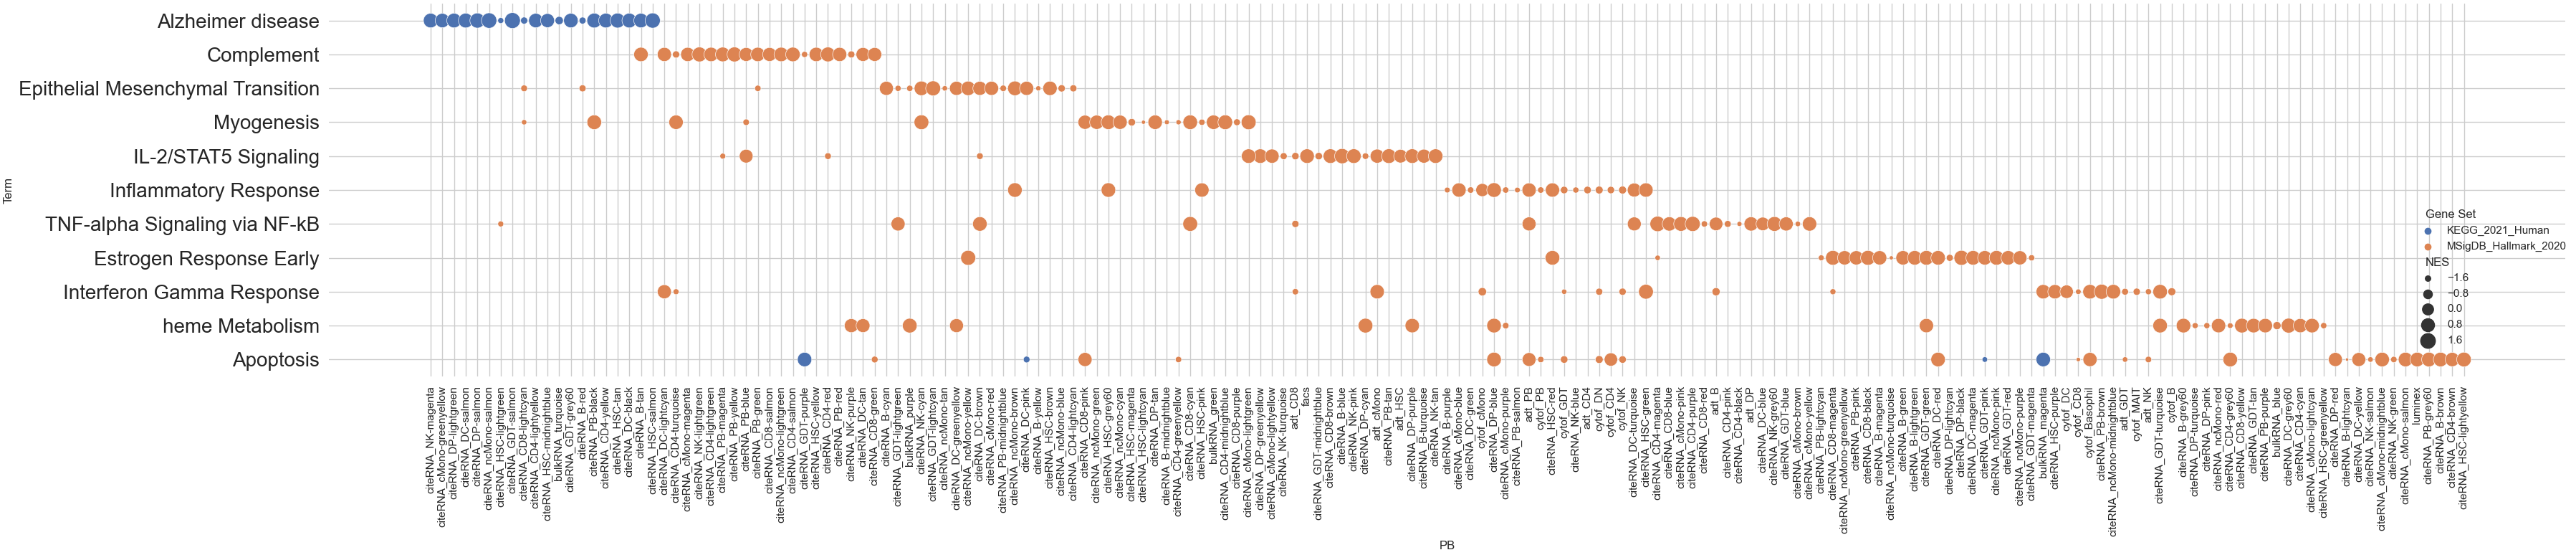

In [ ]:
sns.set_theme(style="whitegrid")
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_ranked_L1_subset,
    x="PB", y="Term",
    hue="Gene Set", size="NES",
    #palette=cmap, 
    sizes=(10, 250),
    height=8, aspect=4
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/ranked-MoGCN-level1")))

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/266386155.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/266386155.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Estrogen Response Early'),
  Text(0, 1, 'Unfolded Protein Response'),
  Text(0, 2, 'Myc Targets V2'),
  Text(0, 3, 'Autoimmune thyroid disease'),
  Text(0, 4, 'IL-6/JAK/STAT3 Signaling'),
  Text(0, 5, 'Allograft Rejection'),
  Text(0, 6, 'Epithelial Mesenchymal Transition'),
  Text(0, 7, 'UV Response Up'),
  Text(0, 8, 'IL-2/STAT5 Signaling'),
  Text(0, 9, 'Interferon Gamma Response'),
  Text(0, 10, 'B cell receptor signaling pathway'),
  Text(0, 11, 'Apical Junction'),
  Text(0, 12, 'Inflammatory Response'),
  Text(0, 13, 'Apoptosis'),
  Text(0, 14, 'p53 Pathway'),
  Text(0, 15, 'Coagulation'),
  Text(0, 16, 'KRAS Signaling Dn'),
  Text(0, 17, 'AMPK signaling pathway'),
  Text(0, 18, 'Complement'),
  Text(0, 19, 'TNF-alpha Signaling via NF-kB'),
  Text(0, 20, 'Allograft rejection'),
  Text(0

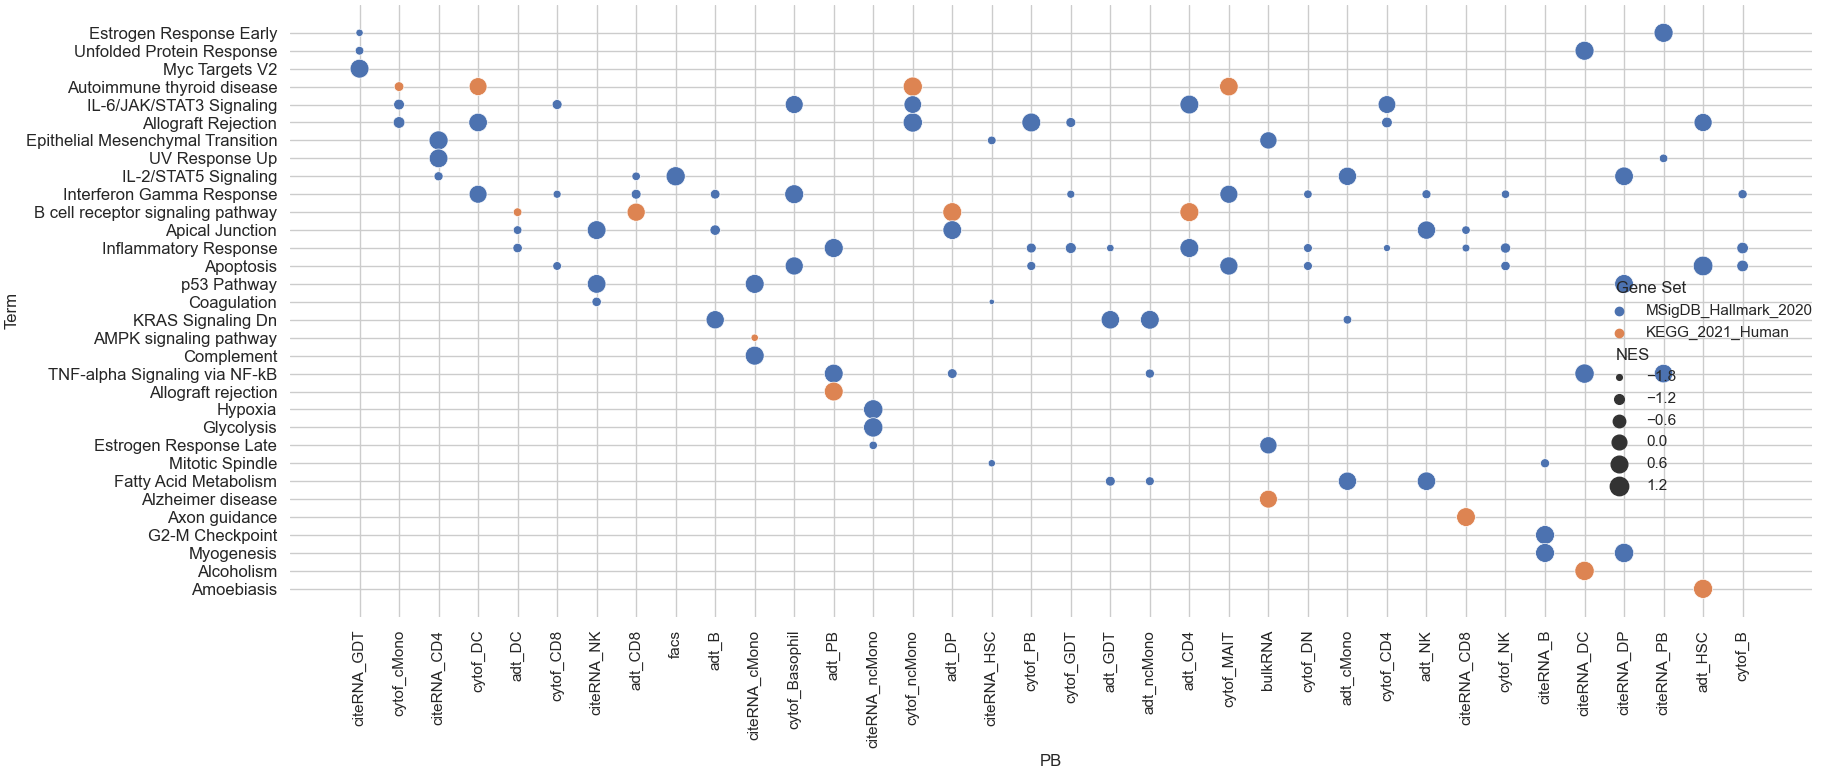

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_ranked_L2,
    x="PB", y="Term",
    hue="Gene Set", size="NES",
    #palette=cmap, 
    sizes=(15, 200),
    height=8, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 12)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/ranked-MoGCN-level2")))

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/2151234174.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/2151234174.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IL-2/STAT5 Signaling'),
  Text(0, 1, 'Inflammatory Response'),
  Text(0, 2, 'Apoptosis'),
  Text(0, 3, 'Autoimmune thyroid disease'),
  Text(0, 4, 'Estrogen Response Late'),
  Text(0, 5, 'Coagulation'),
  Text(0, 6, 'Bile secretion'),
  Text(0, 7, 'Epithelial Mesenchymal Transition'),
  Text(0, 8, 'AGE-RAGE signaling pathway in diabetic complications'),
  Text(0, 9, 'Alzheimer disease'),
  Text(0, 10, 'Allograft Rejection'),
  Text(0, 11, 'TNF-alpha Signaling via NF-kB')])

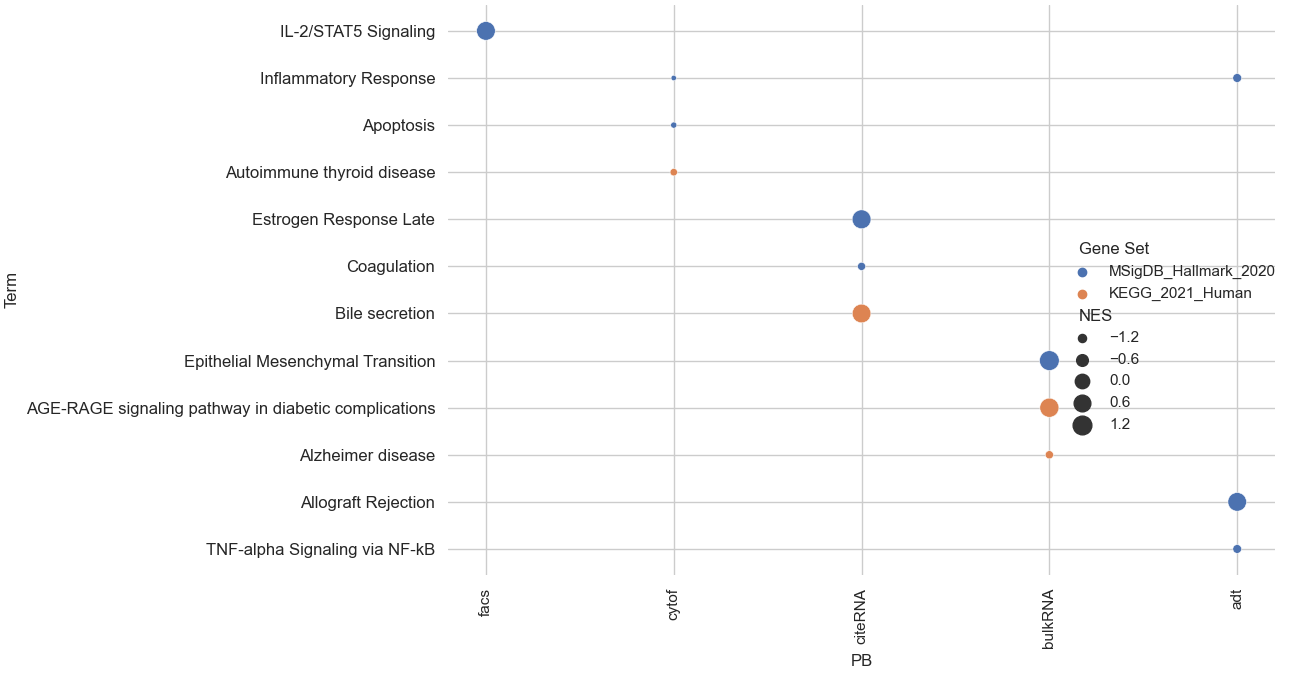

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_ranked_L3,
    x="PB", y="Term",
    hue="Gene Set", size="NES",
    #palette=cmap, 
    sizes=(15, 200),
    height=7, aspect=1.5
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 12)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/ranked-MoGCN-level3")))

In [ ]:
frequent_pathways = {k: v for k, v in sorted(dict(data_unranked_L1.groupby("Term").count()["P-Value"]).items(), key=lambda item: item[1]) if v >= 20} # sort according to scores

data_unranked_L1_subset = None
for term in list(frequent_pathways.keys()):
    subset = data_unranked_L1[data_unranked_L1["Term"] ==  term]
    if data_unranked_L1_subset is None:
        data_unranked_L1_subset = subset
    else:
        data_unranked_L1_subset = pd.concat([data_unranked_L1_subset,subset], axis = 0)

data_unranked_L1_subset

Term              Gene Set P-Value  \
4         G2-M Checkpoint  MSigDB_Hallmark_2020   2.399   
9         G2-M Checkpoint  MSigDB_Hallmark_2020   3.643   
105       G2-M Checkpoint  MSigDB_Hallmark_2020   7.223   
198       G2-M Checkpoint  MSigDB_Hallmark_2020   6.277   
201       G2-M Checkpoint  MSigDB_Hallmark_2020  10.154   
..                    ...                   ...     ...   
673  IL-2/STAT5 Signaling  MSigDB_Hallmark_2020   1.015   
693  IL-2/STAT5 Signaling  MSigDB_Hallmark_2020   2.146   
700  IL-2/STAT5 Signaling  MSigDB_Hallmark_2020   6.769   
721  IL-2/STAT5 Signaling  MSigDB_Hallmark_2020   0.647   
732  IL-2/STAT5 Signaling  MSigDB_Hallmark_2020   2.193   

                             PB  
4             citeRNA_HSC-black  
9        citeRNA_DP-greenyellow  
105  citeRNA_ncMono-greenyellow  
198            citeRNA_GDT-cyan  
201         citeRNA_ncMono-cyan  
..                          ...  
673        citeRNA_cMono-yellow  
693    citeRNA_cMono-lightgreen  
700     citeRNA_HSC-lightyellow  
721          citeRNA_DP-magenta  
732         citeRNA_GDT-magenta  

[219 rows x 4 columns]

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/457694940.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/457694940.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'G2-M Checkpoint'),
  Text(0, 1, 'Cell adhesion molecules'),
  Text(0, 2, 'Herpes simplex virus 1 infection'),
  Text(0, 3, 'Hematopoietic cell lineage'),
  Text(0, 4, 'E2F Targets'),
  Text(0, 5, 'Inflammatory Response'),
  Text(0, 6, 'TNF-alpha Signaling via NF-kB'),
  Text(0, 7, 'IL-2/STAT5 Signaling')])

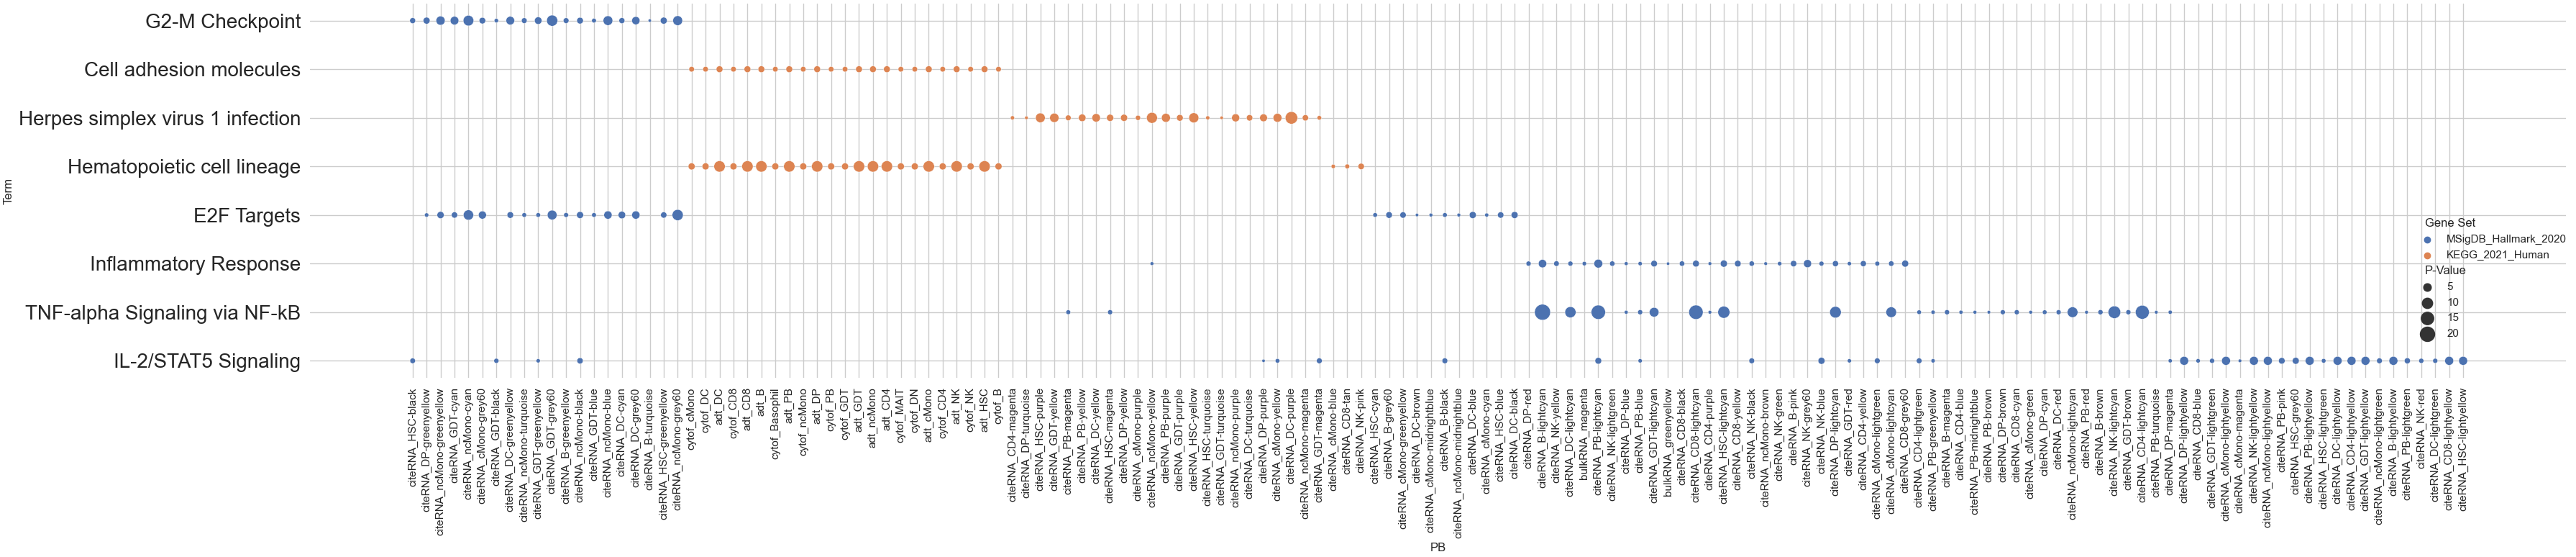

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_unranked_L1_subset,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 250),
    height=8, aspect=4
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-MoGCN-level1")))

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/4272986245.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/4272986245.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Herpes simplex virus 1 infection'),
  Text(0, 1, 'Mitotic Spindle'),
  Text(0, 2, 'Estrogen Response Late'),
  Text(0, 3, 'Hematopoietic cell lineage'),
  Text(0, 4, 'Cell adhesion molecules'),
  Text(0, 5, 'T cell receptor signaling pathway'),
  Text(0, 6, 'Phenylalanine metabolism'),
  Text(0, 7, 'UV Response Dn'),
  Text(0, 8, 'Coagulation'),
  Text(0, 9, 'Allograft Rejection'),
  Text(0, 10, 'Angiogenesis'),
  Text(0, 11, 'Myogenesis'),
  Text(0, 12, 'Estrogen Response Early'),
  Text(0, 13, 'Viral protein interaction with cytokine and cytokine receptor'),
  Text(0, 14, 'Cytokine-cytokine receptor interaction'),
  Text(0, 15, 'Chemokine signaling pathway'),
  Text(0, 16, 'Hypoxia'),
  Text(0, 17, 'IL-2/STAT5 Signaling'),
  Text(0, 18, 'Glycolysis'),
  Text(0, 19, 'Hedgehog Signaling

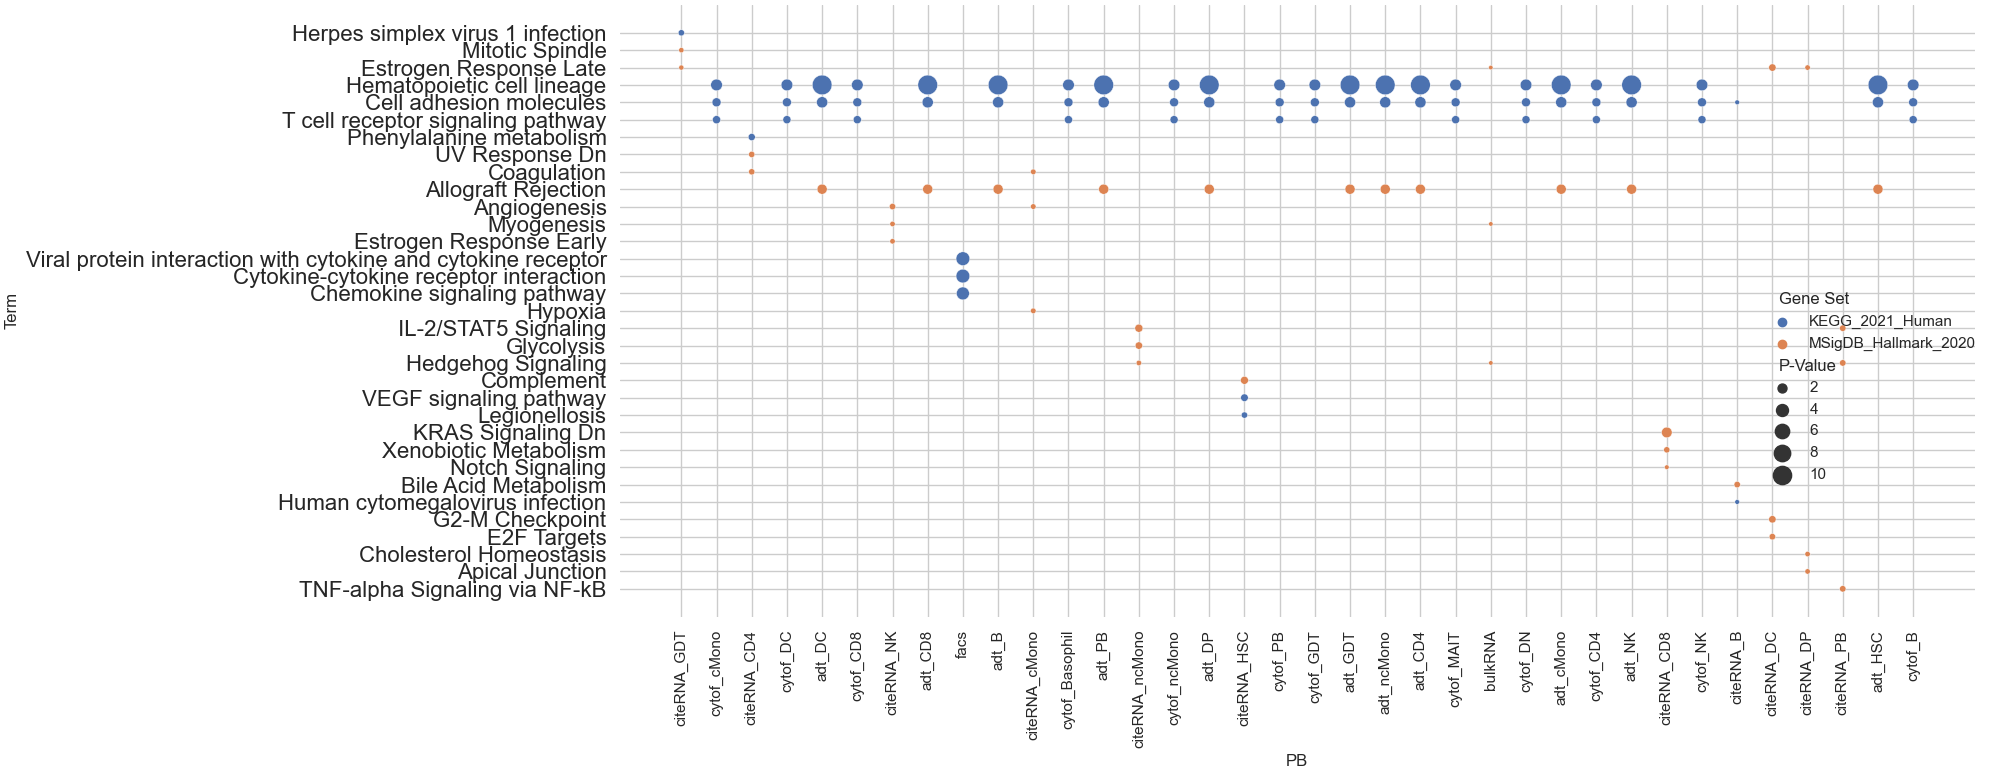

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_unranked_L2,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 200),
    height=8, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 16)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-MoGCN-level2")))

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Viral protein interaction with cytokine and cytokine receptor'),
  Text(0, 1, 'Cytokine-cytokine receptor interaction'),
  Text(0, 2, 'Chemokine signaling pathway'),
  Text(0, 3, 'Hematopoietic cell lineage'),
  Text(0, 4, 'Cell adhesion molecules'),
  Text(0, 5, 'T cell receptor signaling pathway'),
  Text(0, 6, 'Taurine and hypotaurine metabolism'),
  Text(0, 7, 'cAMP signaling pathway'),
  Text(0, 8, 'Nicotine addiction'),
  Text(0, 9, 'Interferon Gamma Response'),
  Text(0, 10, 'Hedgehog Signaling'),
  Text(0, 11, 'Estrogen Response Late'),
  Text(0, 12, 'Allograft Rejection')])

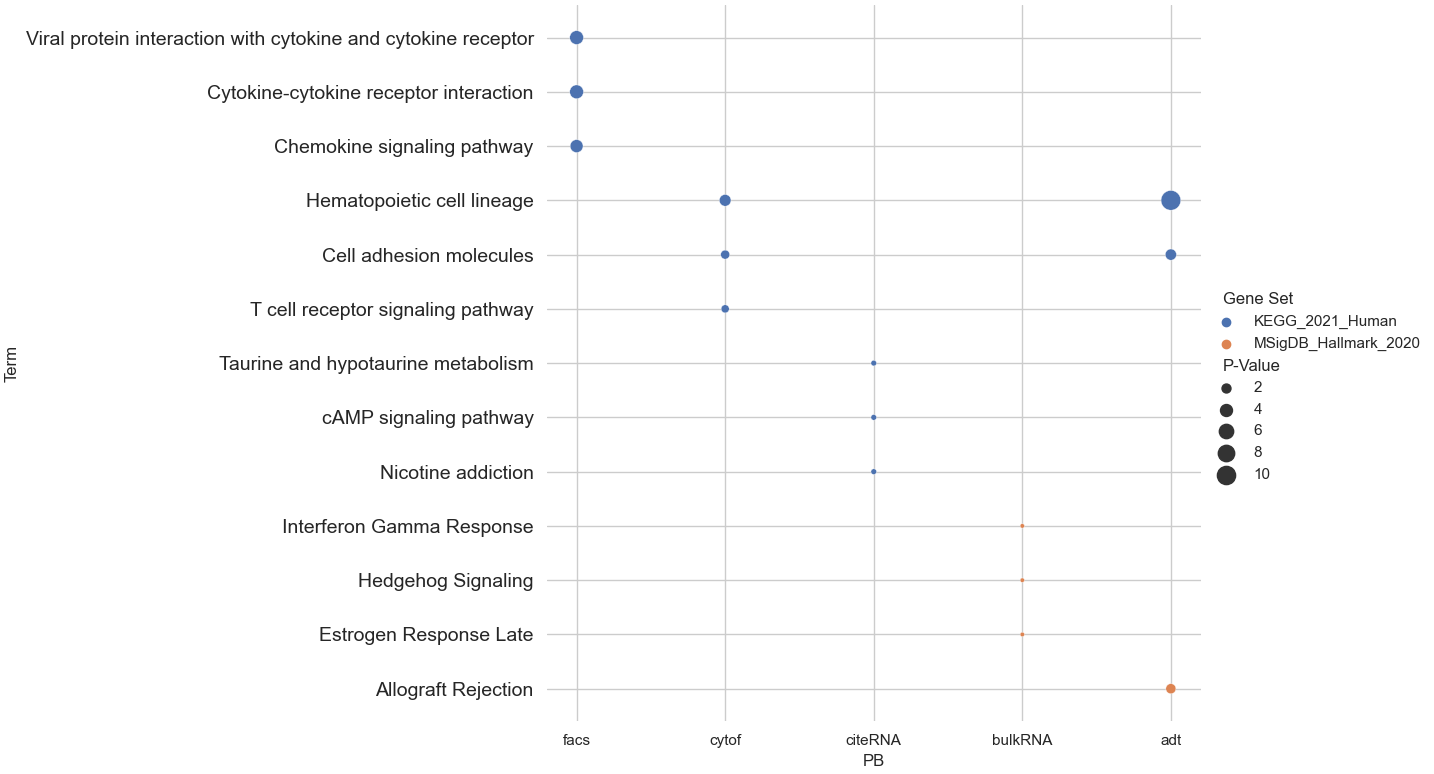

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_unranked_L3,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 200),
    height=8, aspect=1.5
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.yticks(size = 14)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-MoGCN-level3")))

# FEA - SNF

In [ ]:
snf_unranked = {}
s = 0
for k,v in results_L1_snf.items():
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:10][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3) for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            snf_unranked[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": k}
            s+=1
snf_unranked = pd.DataFrame.from_dict(snf_unranked).T

frequent_pathways = {k: v for k, v in sorted(dict(snf_unranked.groupby("Term").count()["P-Value"]).items(), key=lambda item: item[1]) if v >= 2} # sort according to scores

snf_unranked_subset = None
for term in list(frequent_pathways.keys()):
    subset = snf_unranked[snf_unranked["Term"] ==  term]
    if snf_unranked_subset is None:
        snf_unranked_subset = subset
    else:
        snf_unranked_subset = pd.concat([snf_unranked_subset,subset], axis = 0)

snf_unranked_subset

Term              Gene Set P-Value  \
24          Adipogenesis  MSigDB_Hallmark_2020   1.736   
94          Adipogenesis  MSigDB_Hallmark_2020   1.736   
22            Glycolysis  MSigDB_Hallmark_2020   1.736   
92            Glycolysis  MSigDB_Hallmark_2020   1.736   
23  IL-2/STAT5 Signaling  MSigDB_Hallmark_2020   1.736   
..                   ...                   ...     ...   
43      mTORC1 Signaling  MSigDB_Hallmark_2020  21.626   
57      mTORC1 Signaling  MSigDB_Hallmark_2020   6.907   
66      mTORC1 Signaling  MSigDB_Hallmark_2020  21.328   
75      mTORC1 Signaling  MSigDB_Hallmark_2020   5.005   
84      mTORC1 Signaling  MSigDB_Hallmark_2020  47.297   

                           PB  
24       citeRNA_cMono-yellow  
94         citeRNA_CD4-yellow  
22       citeRNA_cMono-yellow  
92         citeRNA_CD4-yellow  
23       citeRNA_cMono-yellow  
..                        ...  
43         citeRNA_cMono-blue  
57         citeRNA_cMono-cyan  
66    citeRNA_cMono-turquoise  
75  citeRNA_cMono-greenyellow  
84        citeRNA_cMono-black  

[82 rows x 4 columns]

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/4222172363.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/4222172363.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Adipogenesis'),
  Text(0, 1, 'Glycolysis'),
  Text(0, 2, 'IL-2/STAT5 Signaling'),
  Text(0, 3, 'Inflammatory Response'),
  Text(0, 4, 'Insulin resistance'),
  Text(0, 5, 'Osteoclast differentiation'),
  Text(0, 6, 'Th17 cell differentiation'),
  Text(0, 7, 'Allograft Rejection'),
  Text(0, 8, 'Endocytosis'),
  Text(0, 9, 'Lysosome'),
  Text(0, 10, 'Mitotic Spindle'),
  Text(0, 11, 'Oxidative Phosphorylation'),
  Text(0, 12, 'Sphingolipid signaling pathway'),
  Text(0, 13, 'Unfolded Protein Response'),
  Text(0, 14, 'Coronavirus disease'),
  Text(0, 15, 'E2F Targets'),
  Text(0, 16, 'G2-M Checkpoint'),
  Text(0, 17, 'Interferon Alpha Response'),
  Text(0, 18, 'Interferon Gamma Response'),
  Text(0, 19, 'Myc Targets V1'),
  Text(0, 20, 'Protein processing in endoplasmic reticulum'),
  Text(0, 21, 'TNF-alpha Signaling via NF-kB'),
  Tex

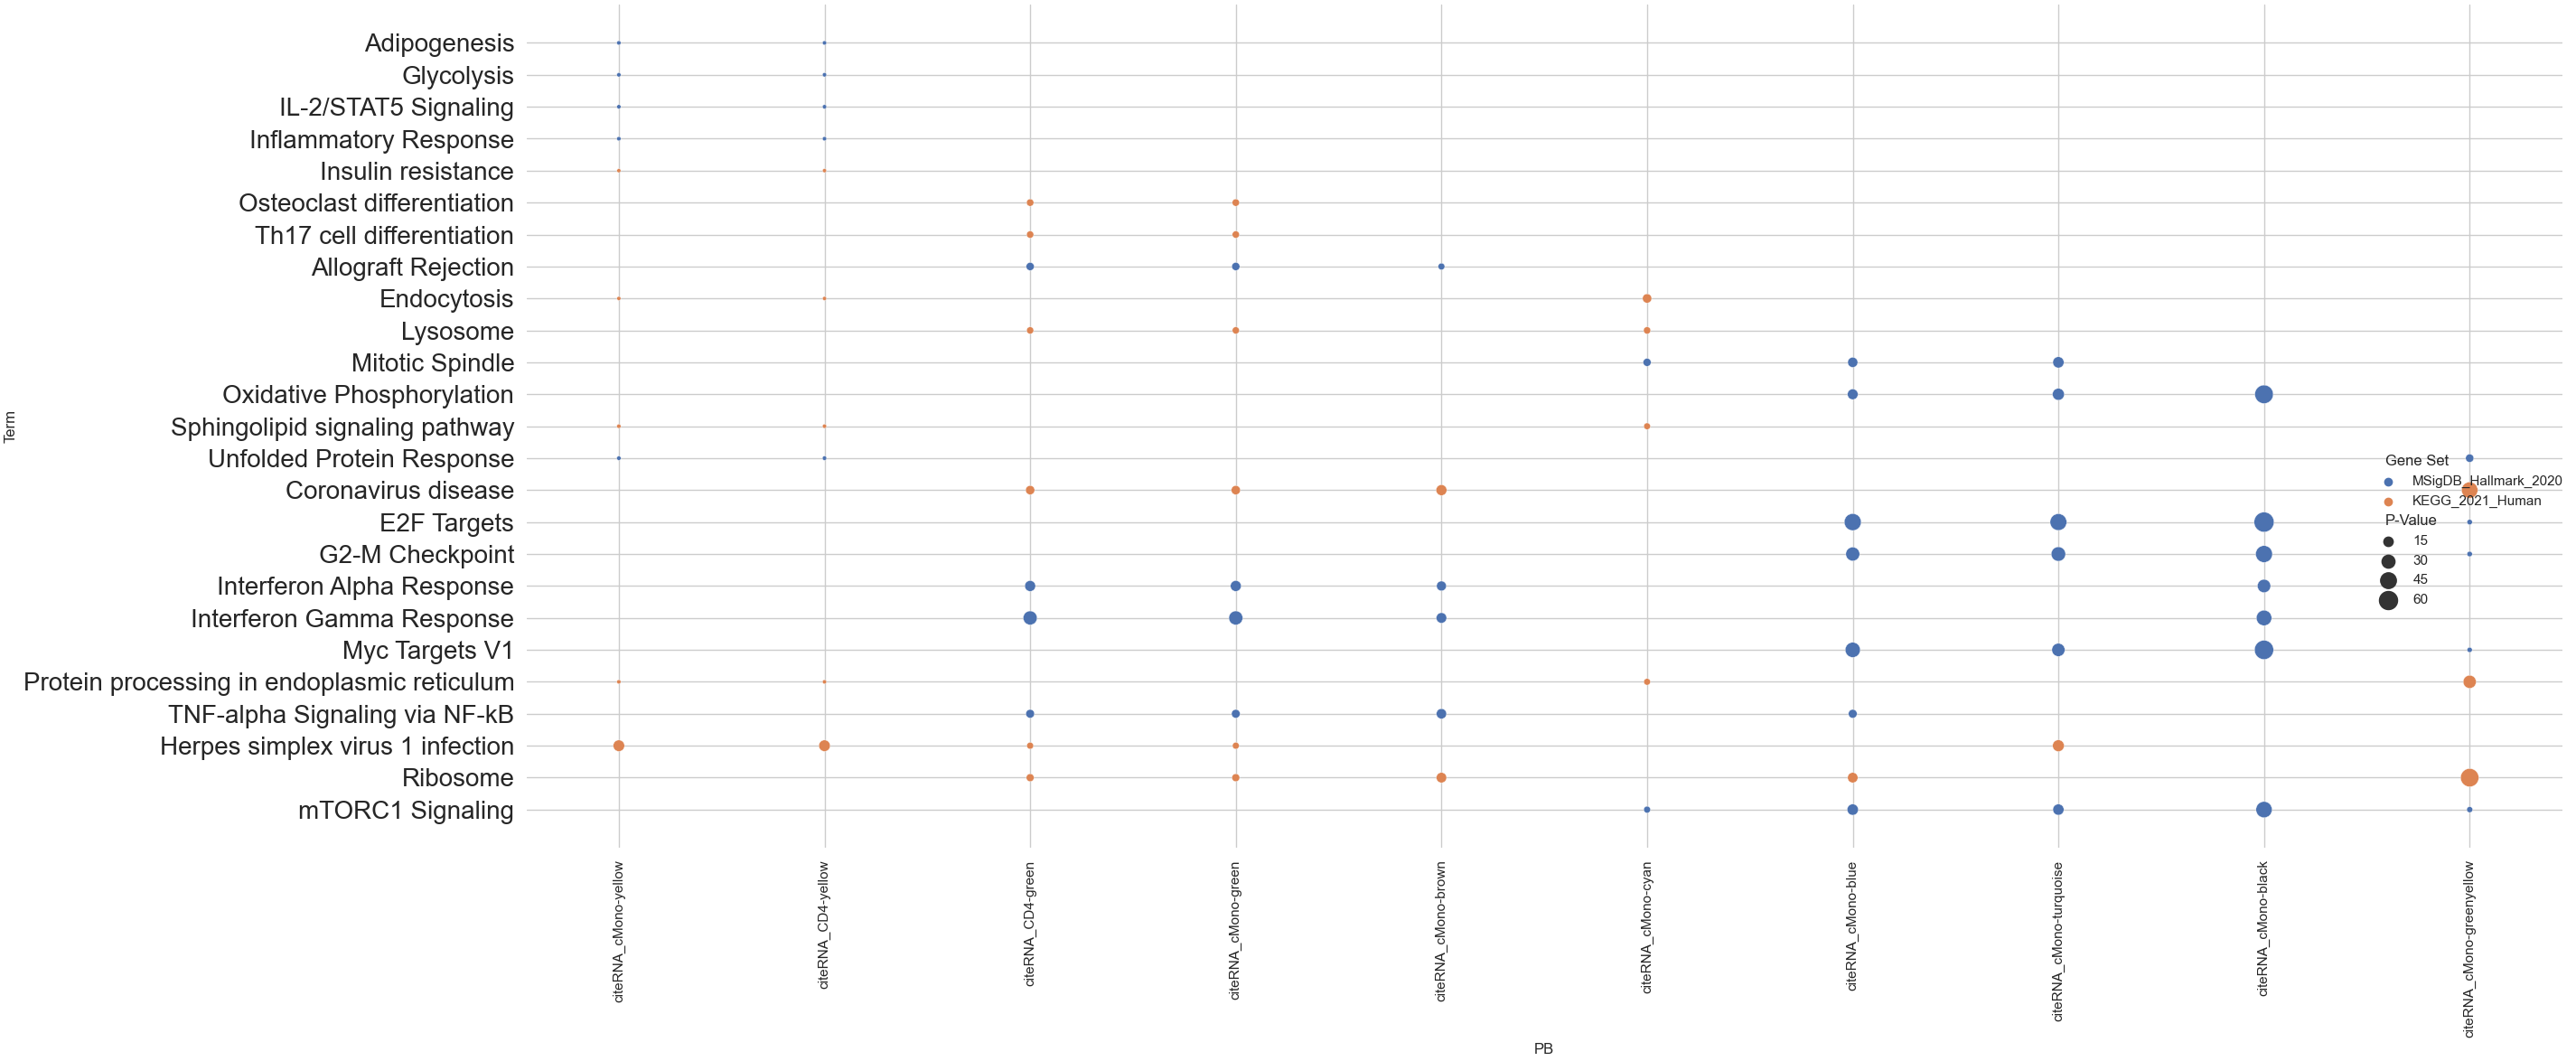

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=snf_unranked_subset,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 250),
    height=12, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-snf-level1")))

In [ ]:
snf_unranked = {}
s = 0
for k,v in results_L2_snf.items():
    v = v["non-ranked"]
    if (not v == "None") and ("Adjusted P-value" in list(v.results.keys())) :
        items = v.results.sort_values("Adjusted P-value")[:10][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3) for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            snf_unranked[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": k}
            s+=1
snf_unranked = pd.DataFrame.from_dict(snf_unranked).T


frequent_pathways = {k: v for k, v in sorted(dict(snf_unranked.groupby("Term").count()["P-Value"]).items(), key=lambda item: item[1]) if v >= 2} # sort according to scores

snf_unranked_subset = None
for term in list(frequent_pathways.keys()):
    subset = snf_unranked[snf_unranked["Term"] ==  term]
    if snf_unranked_subset is None:
        snf_unranked_subset = subset
    else:
        snf_unranked_subset = pd.concat([snf_unranked_subset,subset], axis = 0)

snf_unranked_subset

Term              Gene Set  \
4                                           Apoptosis  MSigDB_Hallmark_2020   
14                                          Apoptosis  MSigDB_Hallmark_2020   
24                                          Apoptosis  MSigDB_Hallmark_2020   
34                                          Apoptosis  MSigDB_Hallmark_2020   
44                                          Apoptosis  MSigDB_Hallmark_2020   
8                          Autoimmune thyroid disease       KEGG_2021_Human   
18                         Autoimmune thyroid disease       KEGG_2021_Human   
28                         Autoimmune thyroid disease       KEGG_2021_Human   
38                         Autoimmune thyroid disease       KEGG_2021_Human   
48                         Autoimmune thyroid disease       KEGG_2021_Human   
1                             Cell adhesion molecules       KEGG_2021_Human   
11                            Cell adhesion molecules       KEGG_2021_Human   
21                            Cell adhesion molecules       KEGG_2021_Human   
31                            Cell adhesion molecules       KEGG_2021_Human   
41                            Cell adhesion molecules       KEGG_2021_Human   
7              Cytokine-cytokine receptor interaction       KEGG_2021_Human   
17             Cytokine-cytokine receptor interaction       KEGG_2021_Human   
27             Cytokine-cytokine receptor interaction       KEGG_2021_Human   
37             Cytokine-cytokine receptor interaction       KEGG_2021_Human   
47             Cytokine-cytokine receptor interaction       KEGG_2021_Human   
0                          Hematopoietic cell lineage       KEGG_2021_Human   
10                         Hematopoietic cell lineage       KEGG_2021_Human   
20                         Hematopoietic cell lineage       KEGG_2021_Human   
30                         Hematopoietic cell lineage       KEGG_2021_Human   
40                         Hematopoietic cell lineage       KEGG_2021_Human   
6                            IL-6/JAK/STAT3 Signaling  MSigDB_Hallmark_2020   
16                           IL-6/JAK/STAT3 Signaling  MSigDB_Hallmark_2020   
26                           IL-6/JAK/STAT3 Signaling  MSigDB_Hallmark_2020   
36                           IL-6/JAK/STAT3 Signaling  MSigDB_Hallmark_2020   
46                           IL-6/JAK/STAT3 Signaling  MSigDB_Hallmark_2020   
5                               Inflammatory Response  MSigDB_Hallmark_2020   
15                              Inflammatory Response  MSigDB_Hallmark_2020   
25                              Inflammatory Response  MSigDB_Hallmark_2020   
35                              Inflammatory Response  MSigDB_Hallmark_2020   
45                              Inflammatory Response  MSigDB_Hallmark_2020   
9   PD-L1 expression and PD-1 checkpoint pathway i...       KEGG_2021_Human   
19  PD-L1 expression and PD-1 checkpoint pathway i...       KEGG_2021_Human   
29  PD-L1 expression and PD-1 checkpoint pathway i...       KEGG_2021_Human   
39  PD-L1 expression and PD-1 checkpoint pathway i...       KEGG_2021_Human   
49  PD-L1 expression and PD-1 checkpoint pathway i...       KEGG_2021_Human   
3                            Primary immunodeficiency       KEGG_2021_Human   
13                           Primary immunodeficiency       KEGG_2021_Human   
23                           Primary immunodeficiency       KEGG_2021_Human   
33                           Primary immunodeficiency       KEGG_2021_Human   
43                           Primary immunodeficiency       KEGG_2021_Human   
2                   T cell receptor signaling pathway       KEGG_2021_Human   
12                  T cell receptor signaling pathway       KEGG_2021_Human   
22                  T cell receptor signaling pathway       KEGG_2021_Human   
32                  T cell receptor signaling pathway       KEGG_2021_Human   
42                  T cell receptor signaling pathway       KEGG_2021_Human   

   P-Value         

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/3669030600.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/3669030600.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Apoptosis'),
  Text(0, 1, 'Autoimmune thyroid disease'),
  Text(0, 2, 'Cell adhesion molecules'),
  Text(0, 3, 'Cytokine-cytokine receptor interaction'),
  Text(0, 4, 'Hematopoietic cell lineage'),
  Text(0, 5, 'IL-6/JAK/STAT3 Signaling'),
  Text(0, 6, 'Inflammatory Response'),
  Text(0, 7, 'PD-L1 expression and PD-1 checkpoint pathway in cancer'),
  Text(0, 8, 'Primary immunodeficiency'),
  Text(0, 9, 'T cell receptor signaling pathway')])

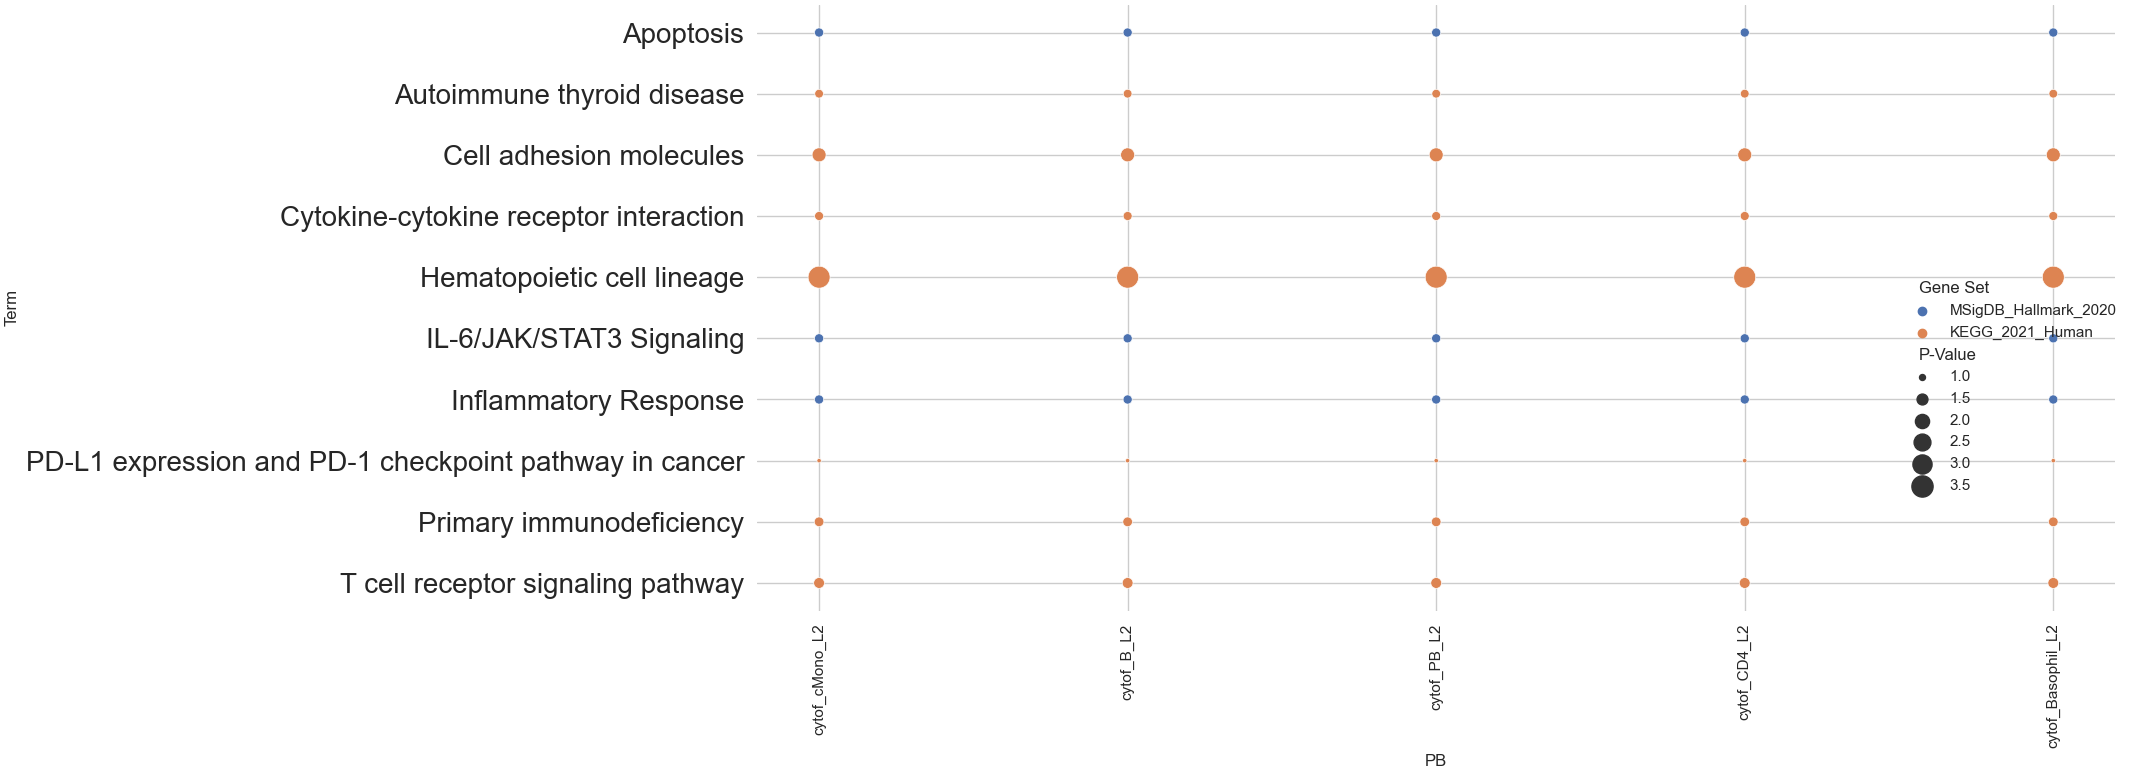

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=snf_unranked_subset,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 250),
    height=8, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-snf-level2")))

# FEA - WA

In [ ]:
wa_unranked = {}
s = 0
for k,v in results_L1_wa.items():
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:10][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3) for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            wa_unranked[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": k}
            s+=1
wa_unranked = pd.DataFrame.from_dict(wa_unranked).T

frequent_pathways = {k: v for k, v in sorted(dict(wa_unranked.groupby("Term").count()["P-Value"]).items(), key=lambda item: item[1]) if v >= 2} # sort according to scores

wa_unranked_subset = None
for term in list(frequent_pathways.keys()):
    subset = wa_unranked[wa_unranked["Term"] ==  term]
    if wa_unranked_subset is None:
        wa_unranked_subset = subset
    else:
        wa_unranked_subset = pd.concat([wa_unranked_subset,subset], axis = 0)

wa_unranked_subset

Term              Gene Set P-Value  \
17                   E2F Targets  MSigDB_Hallmark_2020   3.712   
20                   E2F Targets  MSigDB_Hallmark_2020    52.2   
47  Epstein-Barr virus infection       KEGG_2021_Human   6.195   
67  Epstein-Barr virus infection       KEGG_2021_Human   6.195   
37       Estrogen Response Early  MSigDB_Hallmark_2020    4.57   
..                           ...                   ...     ...   
42                      Ribosome       KEGG_2021_Human  18.334   
55                      Ribosome       KEGG_2021_Human   9.816   
62                      Ribosome       KEGG_2021_Human  18.334   
75                      Ribosome       KEGG_2021_Human   9.816   
90                      Ribosome       KEGG_2021_Human  34.825   

                           PB  
17  citeRNA_cMono-greenyellow  
20         citeRNA_cMono-blue  
47        citeRNA_cMono-brown  
67           citeRNA_NK-brown  
37      citeRNA_cMono-magenta  
..                        ...  
42        citeRNA_cMono-brown  
55        citeRNA_cMono-green  
62           citeRNA_NK-brown  
75           citeRNA_NK-green  
90     citeRNA_ncMono-magenta  

[83 rows x 4 columns]

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/2335054373.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_15136/2335054373.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'E2F Targets'),
  Text(0, 1, 'Epstein-Barr virus infection'),
  Text(0, 2, 'Estrogen Response Early'),
  Text(0, 3, 'G2-M Checkpoint'),
  Text(0, 4, 'Human T-cell leukemia virus 1 infection'),
  Text(0, 5, 'Huntington disease'),
  Text(0, 6, 'IL-2/STAT5 Signaling'),
  Text(0, 7, 'Intestinal immune network for IgA production'),
  Text(0, 8, 'Leishmaniasis'),
  Text(0, 9, 'Lysosome'),
  Text(0, 10, 'Osteoclast differentiation'),
  Text(0, 11, 'Oxidative Phosphorylation'),
  Text(0, 12, 'Th17 cell differentiation'),
  Text(0, 13, 'Toxoplasmosis'),
  Text(0, 14, 'Ubiquitin mediated proteolysis'),
  Text(0, 15, 'Myc Targets V1'),
  Text(0, 16, 'mTORC1 Signaling'),
  Text(0, 17, 'Allograft Rejection'),
  Text(0, 18, 'Herpes simplex virus 1 infection'),
  Text(0, 19, 'p53 Pathway'),
  Text(0, 20, 'Interferon Alpha Response'),
  Text(0, 21, '

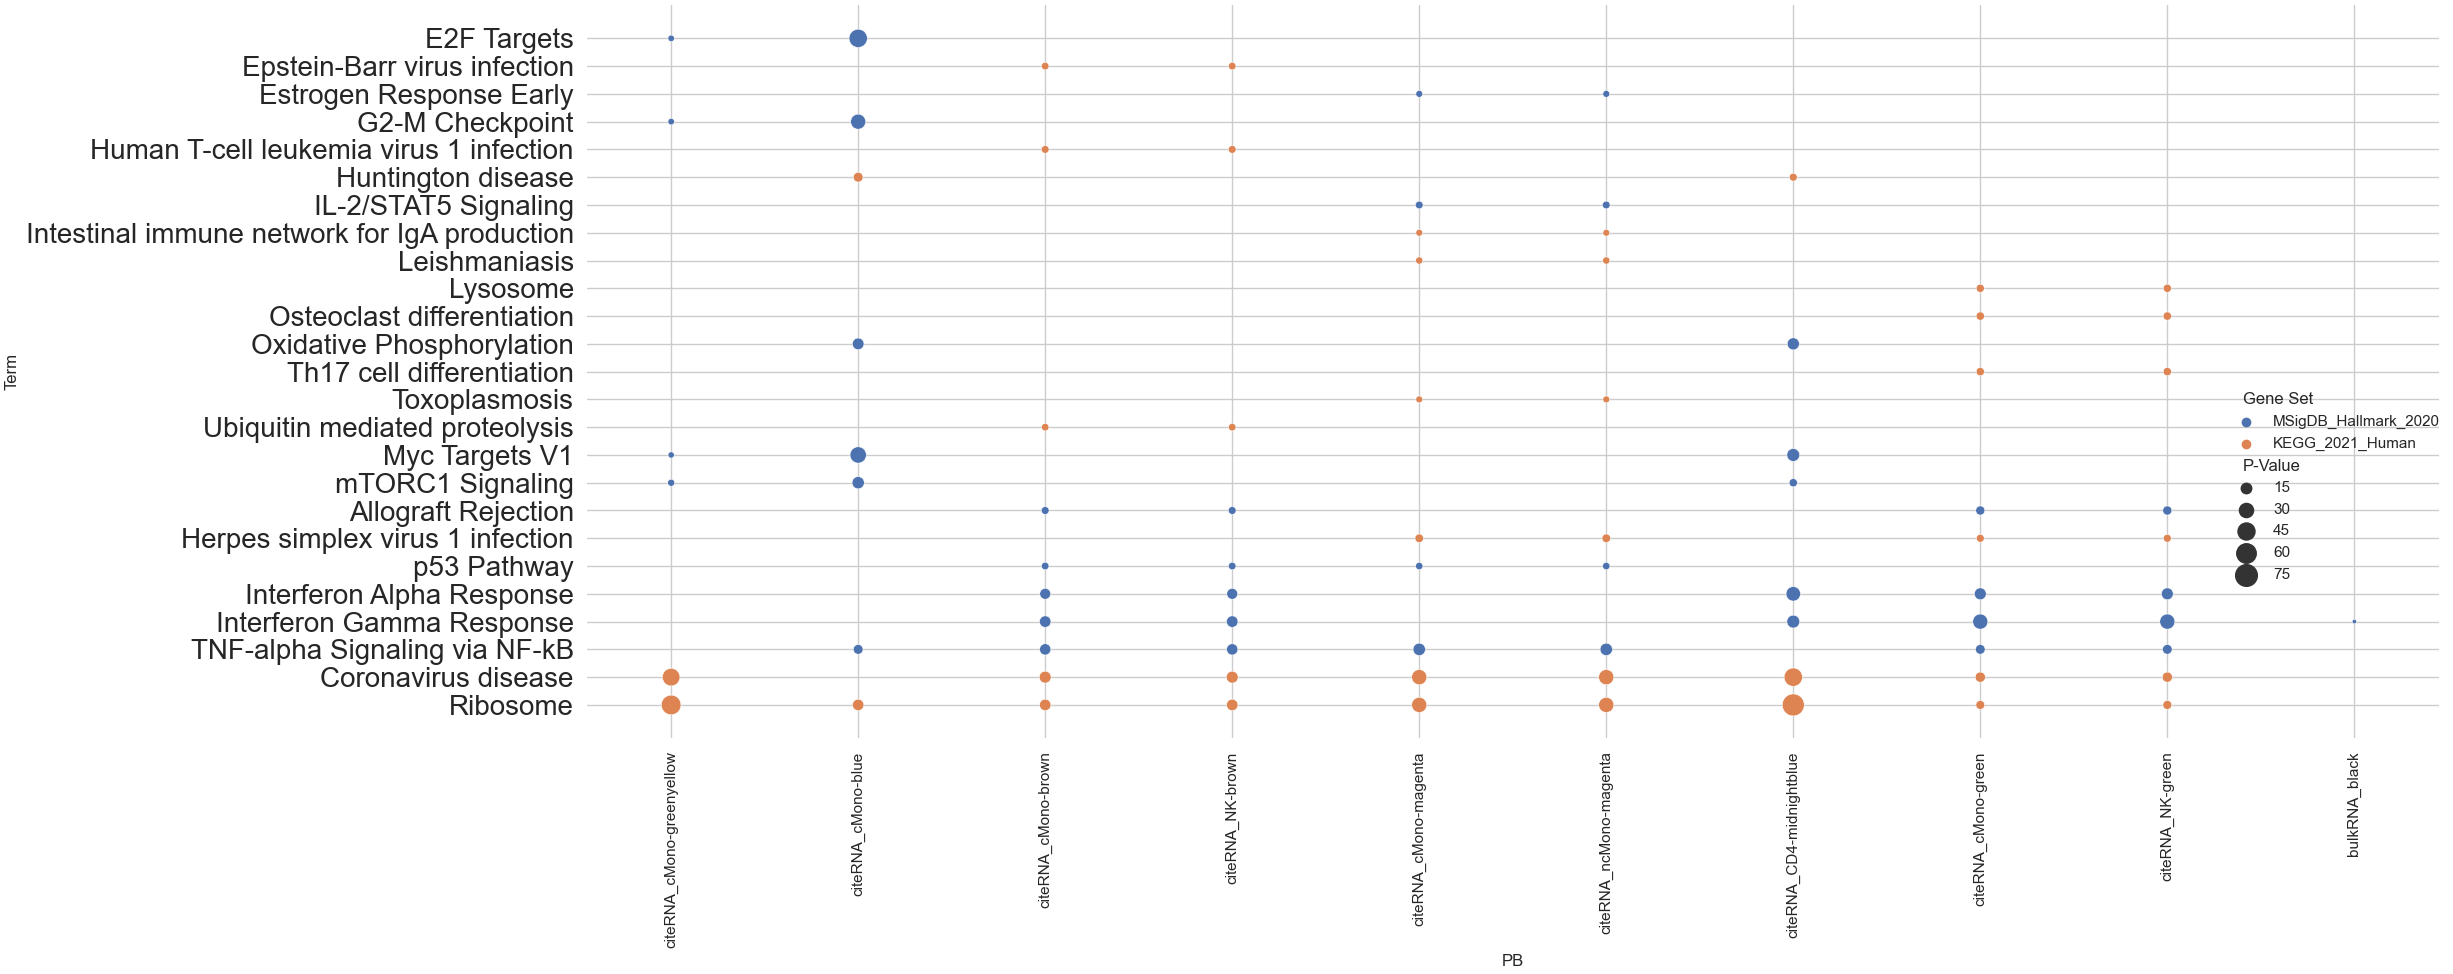

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=wa_unranked_subset,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 250),
    height=10, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-WA-level1")))

In [ ]:
wa_unranked = {}
s = 0
for k,v in results_L2_wa.items():
    v = v["non-ranked"]

    if not v == "None":
        items = v.results.sort_values("Adjusted P-value")[:10][["Gene_set", "Term", "Adjusted P-value"]]

        terms = list(items["Term"])
        gene_sets = list(items["Gene_set"])
        p_val = [round(-math.log(p,10),3) for p in items["Adjusted P-value"]]

        for i in range(len(terms)):
            wa_unranked[s] = {"Term":terms[i], "Gene Set": gene_sets[i], "P-Value":p_val[i], "PB": k}
            s+=1
wa_unranked = pd.DataFrame.from_dict(wa_unranked).T

frequent_pathways = {k: v for k, v in sorted(dict(wa_unranked.groupby("Term").count()["P-Value"]).items(), key=lambda item: item[1]) if v >= 2} # sort according to scores

wa_unranked_subset = None
for term in list(frequent_pathways.keys()):
    subset = wa_unranked[wa_unranked["Term"] ==  term]
    if wa_unranked_subset is None:
        wa_unranked_subset = subset
    else:
        wa_unranked_subset = pd.concat([wa_unranked_subset,subset], axis = 0)

wa_unranked_subset

KeyError: 'Adjusted P-value'

/Users/shakiba/Desktop/thesis.tmp/MoGCN-master/mogcn/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10922/1976191094.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_10922/1976191094.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'E2F Targets'),
  Text(0, 1, 'Estrogen Response Early'),
  Text(0, 2, 'Fatty Acid Metabolism'),
  Text(0, 3, 'Interferon Alpha Response'),
  Text(0, 4, 'KRAS Signaling Dn'),
  Text(0, 5, 'Mitotic Spindle'),
  Text(0, 6, 'Myc Targets V1'),
  Text(0, 7, 'Myc Targets V2'),
  Text(0, 8, 'Olfactory transduction'),
  Text(0, 9, 'Oxidative Phosphorylation')])

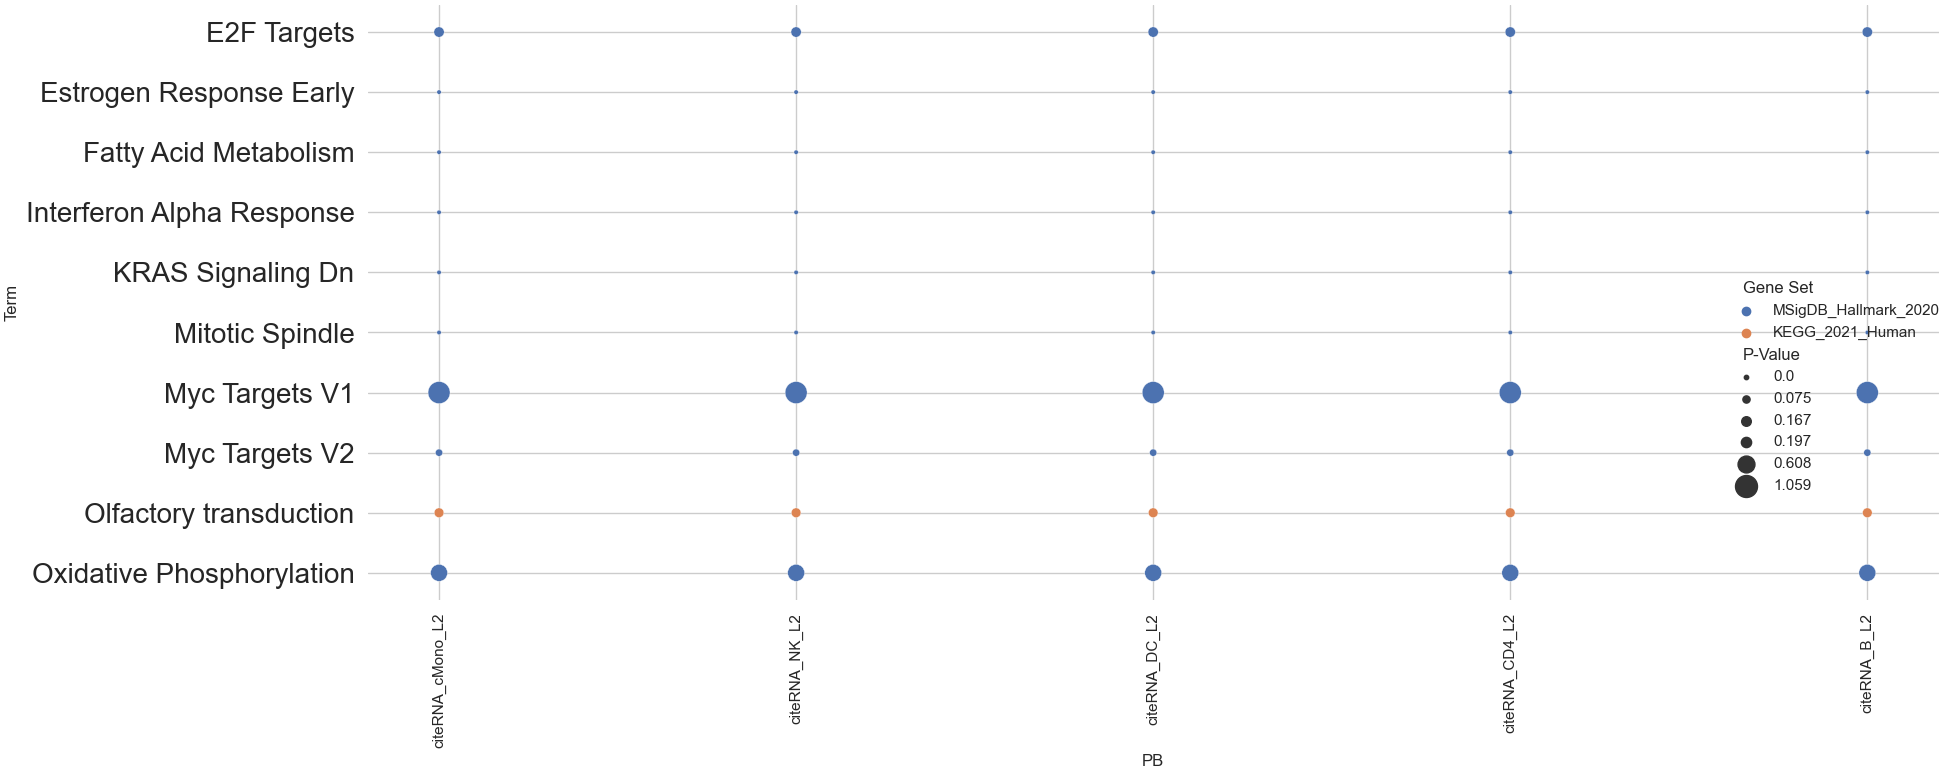

In [ ]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=wa_unranked_subset,
    x="PB", y="Term",
    hue="Gene Set", size="P-Value",
    #palette=cmap, 
    sizes=(10, 250),
    height=8, aspect=2
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.yticks(size = 20)

In [ ]:
g.savefig(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/unranked-WA-level2")))

In [ ]:
results_wa =  {"Level1": results_L1_wa, "Level2": results_L2_wa}
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/pathway_analysis_WA.pickle")), "wb") as f:
    pickle.dump(results_wa, f)

In [ ]:
results_mogcn = {"Level1": results_L1, "Level2": results_L2, "Level3": results_L3 }
results_snf =  {"Level1": results_L1_snf, "Level2": results_L2_snf}
results_wa =  {"Level1": results_L1_wa, "Level2": results_L2_wa}

In [ ]:
with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/pathway_analysis_MoGCN.pickle")), "wb") as f:
     pickle.dump(results_mogcn, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/pathway_analysis_SNF.pickle")), "wb") as f:
    pickle.dump(results_snf, f)

with open(os.path.abspath(os.path.join(os.getcwd(), analysis_input +"/pathway_analysis_WA.pickle")), "wb") as f:
    pickle.dump(results_wa, f)